## Ánalisis de Datos: Primeros Pasos

### #0 Los datasets guía

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



Para poder trabajar la unidad vamos a ponernos en dos situaciones diferentes y a trabajar con dos `datasets` distintos:

#### Caso 1 (top-down EDA): Compañía de Seguros
En este caso, que llamaremos EDA-TD, vamos a partir de un dataset de una compañía de seguros que tiene muy claro lo que quiere que hagas: Quiere que analices el Lifetime Customer Value (el valor acumulado de un cliente a lo largo de su relación con una empresa, por ejemplo: todo el dinero que le has dado a tu compañía de teléfonos), resumidadmente CLV, y la respuesta a las ofertas de marketing. En concreto quiere saber:
1. ¿Cómo se distribuye demográficamente el CLV? (es decir por género, región, nivel de eduación, etc)
2. ¿Cómo responden los clientes a las ofertas de renovación?
3. ¿Cómo se distribuye esa oferta de renovación? (¿Responden mejor los hombres?¿Los dueños de coches de lujo?¿Qué canal tiene mejor respuesta)
4. ¿Qué relación hay entre las reclamaciones y CLV y entre aquellas y la respuesta a marketing?

Para ello cargamos en df_seguros los datos de esta empresa:

In [3]:
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
pd.set_option("display.max_columns", None) #---> Para que muestre todas las columnas
df_seguros.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [4]:
df_seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i


#### Caso 2 (bottom-up EDA): Nuevo departamento DataScience de TabarAir

En est otro caso, que llamaremos EDA-BU, partimos de nuestro conocido dataset de viajes de compañías aéreas, aunque con algunos cambios. La unidad de BI de TabarAir ha creado recientemente una unidad de Ciencia del Dato y como todavía no tiene claro qué quiere hacer nos ha pasado datos que ha conseguido de la competencia junto con los suyos propios y nos pide que le saquemos, literalmente "todo el jugo posible". Vamos que ninguna directriz "operativa"...

 De hecho nos ha pasado datos de dos meses, Junio y Julio, por separado.

Carguemos los datos y hechemos un vistazo:

In [5]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jul = pd.read_csv("./data/dataset_viajes_jul23.csv")

In [6]:
df_air_jun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB



### #1 Completa lo que sabes de tus datos: definiciones y temporalidad

Y ahora sí, empezamos y lo primero que te comento que hagas es una ficha y una tabla como la siguiente:

**Dataset:**  
**Descripción:**  
**Periodo:**  

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Col1|Se trata de la variable que mide x...|||||

Y que rellenes la parte superior y las dos primeras columnas (no rellenes tipo porque no se refiere al tipo de los valores, lo vemos más adelante) y la de notas con todo aquello especial de lo que te hayan podido informar cuando recabaste los datos y sus definiciones. Si no puedes o no lo tienes claro, PREGUNTA (a quien te proporcionó los datos)


#### Caso 1: Seguros, top-down

**Dataset:**  Marketing-Customer-Analysis.csv  
**Descripción:** Datos acumulados de clientes con CLV, respuestas de marketing y datos demográficos y de partes  
**Periodo:**  Foto global hasta la fecha desde el comienzo de operaciones. 

| Nombre del campo                  | Descripción                                                                 | Tipo de variable | Importancia Inicial | Notas |
|-----------------------------------|----------------------------------------------------------------------------|------------------|---------------------|-------|
| customer                          | ID del cliente                                                             |                  |                     |       |
| state                             | Estados en US                                                              |                  |                     |       |
| customer_lifetime_value           | CLV es el valor económico del cliente para la empresa durante toda su relación |                  |                     |   En dolares    |
| response                          | Respuesta a campañas/llamadas (marketing-engagement)                       |                  |                     |       |
| coverage                          | Tipo de cobertura del cliente                                              |                  |                     |       |
| education                         | Nivel educativo del cliente                                                |                  |                     |       |
| effective_to_date                 | Fecha efectiva                                                             |                  |                     |       |
| employmentstatus                  | Estado laboral del cliente                                                 |                  |                     |       |
| gender                            | Género del cliente                                                         |                  |                     |       |
| income                            | Ingresos del cliente                                                       |                  |                     |       |
| location_code                     | Zona de residencia del cliente                                             |                  |                     |       |
| marital_status                    | Estado Civil del cliente                                                   |                  |                     |       |
| monthly_premium_auto              | Premium mensual                                                            |                  |                     |       |
| months_since_last_claim           | Última reclamación del cliente                                             |                  |                     |       |
| months_since_policy_inception     | Inicio de la póliza                                                        |                  |                     |       |
| number_of_open_complaints         | Reclamaciones abiertas                                                     |                  |                     |  Son partes, no quejas     |
| number_of_policies                | Número de pólizas                                                          |                  |                     |       |
| policy_type                       | Tipo de póliza                                                             |                  |                     |       |
| policy                            | Póliza                                                                     |                  |                     |       |
| renew_offer_type                  | Oferta de renovación                                                       |                  |                     |       |
| sales_channel                     | Canal de ventas (primer contacto compañía-cliente)                         |                  |                     |  Puede continuar en otro canal diferente     |
| total_claim_amount                | Monto de la reclamación                                                    |                  |                     |       |
| vehicle_class                     | Tipo de vehículo                                                           |                  |                     |       |
| vehicle_size                      | Tamaño del vehículo                                                        |                  |                     |       |


#### Caso 2: Viajes, bottom-up

**Dataset1:**  dataset_viajes_jun23.csv  
**Descripción:** Datos de vuelos de las cinco compañías, con origen, destino, ingresos para el mes de Junio de 2023  
**Periodo:**  Foto para el mes de junio. Sin datos diarios.

**Dataset2:**  dataset_viajes_jun23.csv  
**Descripción:** Datos de vuelos de las cinco compañías, con origen, destino, ingresos para el mes de Julio de 2023  
**Periodo:**  Foto para el mes de julio. Sin datos diarios.  

| Nombre del campo | Descripción                                              | Tipo de variable | Importancia Inicial | Notas |
|------------------|----------------------------------------------------------|------------------|---------------------|-------|
| aircompany       | Nombre de la compañía aérea                              |        |                     |       |
| origen           | Aeropuerto o ciudad de salida del vuelo                  |       |                     |       |
| destino          | Aeropuerto o ciudad de llegada del vuelo                 |       |                     |       |
| distancia        | Distancia recorrida por el vuelo en kilómetros           |      |                     |       |
| avion            | Modelo o tipo de avión utilizado en el vuelo             |      |                     |       |
| con_escala       | Indicador de si el vuelo tiene escalas (Sí/No)           |          |                     |       |
| consumo_kg       | Consumo de combustible en kilogramos del vuelo           |        |                     |       |
| duracion         | Tiempo total del vuelo en minutos                |        |                     |       |
| ingresos         | Ingresos generados por el vuelo                         |         |                     |   Euros    |
| id_vuelo         | Identificador del vuelo                            |        |                     | Es el mismo para Origen-Destino y compañía, no es único      |
| mes              | Mes en el que se realizó el vuelo                        |       |                     |    Con año   |


### #2 Completa lo que sabes de tus datos: variables numéricas y categóricas

Es hora de rellenar la columna de tipo de variables, pero no el tipo Python o pandas, sino el tipo categórico, numérico, fecha o booleanos que ya vimos. ¿Por qué? Porque las vamos a tratar diferentes y sobre todo, porque a la hora de hacer el análisis lo despiezaremos por un tipo de variables y lo realizaremos sobre otro tipo de variables (en general, no hay un caso único).

Entonces para poder rellenar nuestra columna, repasemos los tipos de forma somera

#### Variables categóricas, numéricas, fechas y binarias:

Lo primero, llamamos variable o feature o característica a cada una de las columnas de nuestros datos tabulares. Y ahora sobre esas vamos a marcar que tipo son siguiendo el siguiente esquema: 


Y en general también distiguiremos las tipo Fecha (si no nos las han dado convertidas) y un tipo especial de Categóricas que son las que solo tienen dos valores (las binarias)


In [7]:
# Caso 1. Selección

df_tipificacion = pd.DataFrame([df_seguros.nunique(), df_seguros.nunique()/len(df_seguros) * 100, df_seguros.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
customer,9134,100.0,object
state,5,0.054741,object
customer_lifetime_value,8041,88.03372,float64
response,2,0.021896,object
coverage,3,0.032844,object
education,5,0.054741,object
effective_to_date,59,0.645938,object
employmentstatus,5,0.054741,object
gender,2,0.021896,object
income,5694,62.338515,int64


In [8]:
df_seguros.effective_to_date 

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object

Ahora podemos hacer una clasificación directa por la cardinalidad, directamente los que tengan 2 serán binarios, los que tengan menos de 10 valores categóricas y el resto numéricas.   
Dentro de las numéricas, las que tengan % de cardinalidad superior al 30% las consideraremos continuas, el resto serán discretas.  

Y finalmente las de cardinalidad 100% serán indices. Ojos estos valores umbral pueden cambiar y además después de esta clasificació automática debemos hacer un repaso teniendo en cuenta la definición y ajustar las que necesitemos (por ejemplo las categóricas habrá que separarlas en ordinales y nominales, las tipo fecha que no aparecen como tal pues como fechas). Hagamos el primer análisis para el caso 1, y te dejo resueto el caso 2 para que lo hagas por tu cuenta.

In [9]:
df_tipificacion["Clasificada_como"] = "Categorica" # Partiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion


,Card,%_Card,Tipo,Clasificada_como
customer,9134,100.0,object,Numerica Continua
state,5,0.054741,object,Categorica
customer_lifetime_value,8041,88.03372,float64,Numerica Continua
response,2,0.021896,object,Binaria
coverage,3,0.032844,object,Categorica
education,5,0.054741,object,Categorica
effective_to_date,59,0.645938,object,Numerica Discreta
employmentstatus,5,0.054741,object,Categorica
gender,2,0.021896,object,Binaria
income,5694,62.338515,int64,Numerica Continua


+ Si las repasamos, vemos que customer con esa cardinalidad, y viendo sus valores, es claramente un índice. Y lo marcaremos así.
+ Las otras variables que me llaman la atención: effective_to_date (por la definición que claramente dice que es una fecha), todas las que comienzan por number (porque tienen pinta de que son numéricas discretas y así es como es mejor clasificarlas).
+ Para estas haremos un unique:


In [10]:
df_seguros.effective_to_date.unique() # Sí es una fecha

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [11]:
df_seguros.number_of_open_complaints.unique()

array([0, 2, 1, 3, 5, 4], dtype=int64)

In [12]:
df_seguros.number_of_policies.unique()

array([1, 8, 2, 7, 9, 4, 3, 6, 5], dtype=int64)

Decido cambiar los tipos a estas tres, (a las de number porque no sólo es un orden 8>7 etc sino porque 4 polizas abiertas son el doble que 2... y esa relación matemática quiero seguir considerándola al menos por ahora). 

Nuestra tabla descriptiva quedaría como:


| Nombre del campo                  | Descripción                                                                 | Tipo de variable      | Importancia Inicial | Notas |
|-----------------------------------|----------------------------------------------------------------------------|-----------------------|---------------------|-------|
| customer                          | ID del cliente                                                             | Índice Único           |                     |       |
| state                             | Estados en US                                                              | Categórica            |                     |       |
| customer_lifetime_value           | CLV es el valor económico del cliente para la empresa durante toda su relación | Numérica Continua    |                     |       |
| response                          | Respuesta a campañas/llamadas (marketing-engagement)                       | Binaria          |                     |       |
| coverage                          | Tipo de cobertura del cliente                                              | Categórica            |                     |       |
| education                         | Nivel educativo del cliente                                                | Categórica            |                     |       |
| effective_to_date                 | Fecha efectiva                                                             | Fecha                 |                     |       |
| employmentstatus                  | Estado laboral del cliente                                                 | Categórica            |                     |       |
| gender                            | Género del cliente                                                         | Binaria            |                     |       |
| income                            | Ingresos del cliente                                                       | Numérica Continua     |                     |       |
| location_code                     | Zona de residencia del cliente                                             | Categórica            |                     |       |
| marital_status                    | Estado Civil del cliente                                                   | Categórica            |                     |       |
| monthly_premium_auto              | Premium mensual                                                            | Numérica Continua     |                     |       |
| months_since_last_claim           | Última reclamación del cliente                                             | Numérica Continua     |                     |       |
| months_since_policy_inception     | Inicio de la póliza                                                        | Numérica Continua     |                     |       |
| number_of_open_complaints         | Reclamaciones abiertas                                                     | Numérica Discreta     |                     |       |
| number_of_policies                | Número de pólizas                                                          | Numérica Discreta     |                     |       |
| policy_type                       | Tipo de póliza                                                             | Categórica            |                     |       |
| policy                            | Póliza                                                                     | Categórica            |                     |       |
| renew_offer_type                  | Oferta de renovación                                                       | Categórica            |                     |       |
| sales_channel                     | Canal de ventas (primer contacto compañía-cliente)                         | Categórica            |                     |       |
| total_claim_amount                | Monto de la reclamación                                                    | Numérica Continua     |                     |       |
| vehicle_class                     | Tipo de vehículo                                                           | Categórica            |                     |       |
| vehicle_size                      | Tamaño del vehículo                                                        | Categórica            |                     |       |


#### Caso 2. Definición de tipos.
Aquí te dejo lo que sería mi resultado para el análisis inicial de tipos en el caso de los vuelos aéreos:

| Nombre del campo | Descripción                                              | Tipo de variable | Importancia Inicial | Notas |
|------------------|----------------------------------------------------------|------------------|---------------------|-------|
| aircompany       | Nombre de la compañía aérea                              | Categórica       |                     |       |
| origen           | Aeropuerto o ciudad de salida del vuelo                  | Categórica       |                     |       |
| destino          | Aeropuerto o ciudad de llegada del vuelo                 | Categórica       |                     |       |
| distancia        | Distancia recorrida por el vuelo en kilómetros           | Numérica Continua       |                     |       |
| avion            | Modelo o tipo de avión utilizado en el vuelo             | Categórica       |                     |       |
| con_escala       | Indicador de si el vuelo tiene escalas (Sí/No)           | Binaria          |                     |       |
| consumo_kg       | Consumo de combustible en kilogramos del vuelo           | Numérica Continua        |                     |       |
| duracion         | Tiempo total del vuelo en minutos                | Numérica Continua     |                     |       |
| ingresos         | Ingresos generados por el vuelo                          | Numérica Continua     |                     |       |
| id_vuelo         | Identificador único del vuelo                            | Categórica       |                     |       |
| mes              | Mes en el que se realizó el vuelo                        | Categórica        |                     | No aporta mientras no se compare con otros meses       |


### #3 Variables directoras (target)

Hemos avanzado. Por lo menos esto nos servirá luego para hacer mejor el análisis con más de una variable. Pero ahora lo que tenemos que hacer es intentar priorizar un poco más las variables [Imaginate tener 6000 campos o variables, si quisieramos hacer un EDA exahustivo no acabamos ni en 3 años, en el caso de nuestros dataset igual podríamos estudiar todas las variables y todas sus posibles combinaciones, pero si tengo un tiempo limitado mejor priorizar]. Con dos criterios:  

* Marcar las que son principales o directoras (serán lo que llamaremos target cuando entremos en modelos). [Por ejemplo en el caso de la aseguradora tenemos el customer_lifetime_value y el response como dos variables importantes. En el caso de los aviones tendremos que usar nuestra intuición o poner de primera las que más nos guste, pero allí donde haya ingresos o costes, si no nos dicen nada más, las consideraremos como directoras.]

* Marcar las variables que puedan ser interesantes para hacer un estudio agrupando por las mismas. [De nuevo en el caso de la aseguradora nos dice que necesita agrupar o estudiar por las demográficas, por el tipo de oferta, el canal. En general aquí van a entrar normalmente categóricas. En el caso de los aviones, como no tenemos directrices, busca valores categóricos y ordénalos por la importancia directa a tu empresa, por ejemplo es más importante entender como funciona la competencia que el tipo de avion o el destino, pero entre destino/origen y tipo de avion??? Cuando hay tan pocas, las marcamos todas y haremos el estudio agrupando por cualquiera de ellas.]

Según esos criterios, a mí me sale lo siguiente (pero ojo aquí entra un poco el sentido común y el conocimiento,sí, del negocio), clasificándolas en **target/directora (0), agrupación importante (1), agrupación interesante (2), agrupación secundaria (3)**

#### Caso 1.

| Nombre del campo                  | Descripción                                                                 | Tipo de variable      | Importancia Inicial | Notas                                                     |
|-----------------------------------|----------------------------------------------------------------------------|-----------------------|---------------------|-----------------------------------------------------------|
| customer                          | ID del cliente                                                             | Categórica            | -                   | Identificador único, para análisis muy de detalle (outliers)           |
| state                             | Estados en US                                                              | Categórica            | 2                   | Puede influir en las preferencias y necesidades del cliente|
| customer_lifetime_value           | CLV es el valor económico del cliente para la empresa durante toda su relación | Numérica Continua    | 0                   | Indicador clave de la lealtad y rentabilidad del cliente  |
| response                          | Respuesta a campañas/llamadas (marketing-engagement)                       | Categórica            | 0                   | Mide la eficacia del engagement y marketing y nos la han marcado como importante              |
| coverage                          | Tipo de cobertura del cliente                                              | Categórica            | 2                   | Relacionado con el nivel de servicio y precio              |
| education                         | Nivel educativo del cliente                                                | Categórica            | 1                   | Demográfica  |
| effective_to_date                 | Fecha efectiva                                                             | Fecha                 | -                 | Todos los valores al mes de estudio, no valor real aparente |
| employmentstatus                  | Estado laboral del cliente                                                 | Categórica            | 2                   | Puede influir en la capacidad de pago y tipo de servicio   |
| gender                            | Género del cliente                                                         | Categórica            | 1                   | Útil para análisis demográfico                             |
| income                            | Ingresos del cliente                                                       | Numérica Continua     | 0                   | Indica el poder adquisitivo y potencial de gasto del cliente |
| location_code                     | Zona de residencia del cliente                                             | Categórica            | 1                   | Clave para análisis regional y de accesibilidad            |
| marital_status                    | Estado Civil del cliente                                                   | Categórica            | 1                   | Demográfica             |
| monthly_premium_auto              | Premium mensual                                                            | Numérica Continua     | 1                   | Indicador de ingresos recurrentes y lealtad del cliente   |
| months_since_last_claim           | Última reclamación del cliente                                             | Numérica Continua     | 2                   | Proporciona información sobre la frecuencia de reclamaciones |
| months_since_policy_inception     | Inicio de la póliza                                                        | Numérica Continua     | 2                   | Útil para entender la antigüedad y lealtad del cliente     |
| number_of_open_complaints         | Reclamaciones abiertas                                                     | Numérica Discreta     | 3                   | Indica el nivel de satisfacción o problemas del cliente    |
| number_of_policies                | Número de pólizas                                                          | Numérica Discreta     | 1                   | Refleja la diversificación y la profundidad de la relación con el cliente |
| policy_type                       | Tipo de póliza                                                             | Categórica            | 2                   | Proporciona insights sobre preferencias de cobertura       |
| policy                            | Póliza                                                                     | Categórica            | 3                   | Detalle específico de la cobertura del cliente             |
| renew_offer_type                  | Oferta de renovación                                                       | Categórica            | 1                   | Mide la efectividad de las estrategias de retención        |
| sales_channel                     | Canal de ventas (primer contacto compañía-cliente)                         | Categórica            | 1                   | Clave para analizar la eficacia de los canales de venta    |
| total_claim_amount                | Monto de la reclamación                                                    | Numérica Continua     | 0                   | Indica el costo de las reclamaciones y la salud financiera de la empresa |
| vehicle_class                     | Tipo de vehículo                                                           | Categórica            | 2                   | Puede indicar preferencias y necesidades específicas       |
| vehicle_size                      | Tamaño del vehículo                                                        | Categórica            | 3                   | Relacionado con el tipo de cobertura y riesgo              |


#### Caso 2.

| Nombre del campo | Descripción                                              | Tipo de variable | Importancia Inicial | Notas                                           |
|------------------|----------------------------------------------------------|------------------|---------------------|-------------------------------------------------|
| aircompany       | Nombre de la compañía aérea                              | Categórica       | 1                   | Importante desde el momento en que es básicamente un análisis comparativo entre compañías|
| origen           | Aeropuerto o ciudad de salida del vuelo                  | Categórica       | 2                   | Importante para análisis geográficos, y de rutas ?hay rutas muy cubiertas?¿poco?     |
| destino          | Aeropuerto o ciudad de llegada del vuelo                 | Categórica       | 2                   | Clave para entender rutas y conexiones y posibles destinos no cubiertos, nuevos mercados          |
| distancia        | Distancia recorrida por el vuelo en kilómetros           | Numérica         | 1                   | Impacta en consumo de combustible y duración    |
| avion            | Modelo o tipo de avión utilizado en el vuelo             | Categórica       | 2                   | Relacionado con la capacidad y eficiencia       |
| con_escala       | Indicador de si el vuelo tiene escalas (Sí/No)           | Binaria          | 3                  | Puede ser interesante, pero hasta no verla con más detalle, parece menos importante que el resto        |
| consumo_kg       | Consumo de combustible en kilogramos del vuelo           | Numérica         | 0                   | Esencial para análisis de eficiencia y costes   |
| duracion         | Tiempo total del vuelo en horas o minutos                | Numérica         | 1                   | Importante para la planificación y logística    |
| ingresos         | Ingresos generados por el vuelo                          | Numérica         | 0                   | Indicador clave de rentabilidad                 |
| id_vuelo         | Identificador único del vuelo                            | Categórica       | -                   | En principio descartada |
| mes              | Mes en el que se realizó el vuelo                        | Categórica       | -                   |  No es útil si no es para la comparación y ya están separados los datasets |


Además he añadido notas que te pueden servir de guía en tu propio EDA. En general consideramos las variables importantes en función del siguiente criterio:
* Indican éxito,fracso y precio o coste: ingresos, numero de clientes, numero de visitas, conversiones, numero de vidas salvadas, numero de ventas, de clientes satisfechos, de personas felices, etc etc y costes (Estas suelen ser importantes siempre, y con un criterio amplio)
* Indican perfiles de cliente, sobre quién o qué debemos actuar o no hacerlo: variables que ayudan a perfilar el cliente, o la entidad que nos interese (empresas en las que invertir, zonas del cuerpo en las que intervenir, etc) 
* Permiten conocer dónde y cuándo: Lugares geográficos, temporales, etc.

### SIGUIENTES PASOS

Todo lo anterior es aplicar unos cálculos, considerar nuestras definiciones y criterios o bien dados o bien genéricos para poner un poco de orden y si es necesario preguntar más antes de epmezar con el análisis. Este se puede continuar de muchas formas, pero nuestro plan para las siguientes sesiones es:

* Vamos a analizar las variables de forma separada. Lo que se llama **análisis univariante**.

* Vamos a analizar las variables relacionándolas entre sí (de dos en dos, **análisis bivarinante**, o en grupos **análisis multivariante**): bien por agrupaciones o bien buscando relaciones matemáticas entre ellas.

- Para cada paso iremos tomando notas, buscando descubrir cosas (con un criterio muy sencillo: Lo que destaque y si no destaca nada, eso es lo destacado). Emplearemos medidas estadísticas, análisis visual sobre gráficas y uso de tablas (de frecuencias generalmente)

- Nuestro análisis estará más guiado o menos en función de si partimos con cuestiones e hipótesis previas o no, pero al terminar una "primera" pasada tendremos conclusiones y respuestas (y la falta de estas también es una conclusión). 

- En ese momento decidiremos si queremos o necesitamos dar una segunda vuelta o tercer vuelta o ahondar en algún aspecto que se no has quedado cojo (puede incluso que queramos más datos) o bien pasamos ya a ordenar nuestras conclusiones de forma que cuenten una historia y entraríamos ya en el sprint siguiente dedicado a mostrar y presentar resultados.



ANEXO:

La estadística se divide en dos grandes áreas:

- **Estadística descriptiva**: Se dedica a la **descripción, visualización y resumen** de datos originados a partir de los fenómenos de estudio. Los datos pueden ser resumidos **numérica o gráficamente**. Su objetivo es organizar y describir las características sobre un conjunto de datos con el propósito de facilitar su aplicación, generalmente con el apoyo de gráficas, tablas o medidas numéricas.

    - Ejemplos básicos de parámetros estadísticos son: la media y la desviación estándar.
    - Ejemplos gráficos son: histograma, pirámide poblacional, gráfico circular, entre otros.
    

- **Estadística inferencial**: Se dedica a la generación de los **modelos, inferencias y predicciones** asociadas a los fenómenos en cuestión teniendo en cuenta la aleatoriedad de las observaciones. Se usa para modelar **patrones en los datos** y extraer inferencias acerca de la población bajo estudio. Estas inferencias pueden tomar la forma de respuestas a preguntas sí/no (prueba de hipótesis), estimaciones de unas características numéricas (estimación). **Su objetivo es obtener conclusiones útiles para lograr hacer deducciones acerca de la totalidad de todas las observaciones hechas, basándose en la información numérica.**

In [13]:
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

Dentro de lo que se conoce como análisis univariante (descripición de cada variable por separado. Si es una variable dispersa, tiene outliers, su rango...) en esta sesión vamos a ver las medidas estadísticas que se conconen como medidas de tendencia central.



### Por qué y para qué

+ De primeras, **permiten resumir los datos**, quizás muy mucho, pero de una forma consistente y con criterio. Por ejemplo, en el caso del seguro, ¿cuánto gana la empresa más o menos por cliente? y en el caso del avión, si quisiera tener un valor de referencia del consumo de combustible, ¿qué valor darías, de todos los que hay? 

Pues eso, las medidas de tendencia central dan una visión muy resumida pero entendible de los datos. Y con un criterio defendible, se llaman así porque indican el punto central o el **valor típico** de un conjunto de datos. Estas medidas "tienden" a ubicarse en el centro de la distribución de los datos. (De ahí su nombre)

+ Además permiten hacer **comparaciones**, quizás gruesas, pero lo permiten, si quiero saber en el caso de las compañías si he consumido más en Junio que Julio podrías comparar esas medidas. Ah, sí las medidas de tendencia central son una por variable. O incluso cuando luego veamos el consumo por compañía o simplemente por vuelo podremos compararlo con la tendencia central que estemos usando y decidir si es un vuelo "más o menos" típico por ejemplo o si hay alguno que se desvía mucho, etc. 

+ Un sólo valor que en función de la distribución puede servirnos para **tomar decisiones**.

+ Finalmente, son la **base de cálculos más complicados** y, en general, más significativos.



Es decir como primer análisis no deja de tener su valor, además de ser muy sencillo. Veámoslas


## Medidas de tendencia central

Las medidas más comunes, sin contar las medidas de posición, son:


* **Media**

* **Moda**

* **Mediana**


Además fijate que son medidas que aplican cada una a un tipo de variable:

* La media la aplicamos a numéricas discretas o continuas  
* La mediana la podemos aplicar a numéricas pero tiene más sentido con categóricas ordinales (donde podemos establecer una relación de orden)  
* La moda la podemos aplicar a las categóricas nominales (y también a las ordinales), no tiene mucho sentido con las numéricas con una cardinalidad media y alta  

## Media 
La [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) es el valor obtenido al sumar todos los *[datos](https://es.wikipedia.org/wiki/Dato)* y dividir el resultado entre el número total elementos. Se suele representar con la letra griega $\mu$. Si tenemos una [muestra](https://es.wikipedia.org/wiki/Muestra_estad%C3%ADstica) de $n$ valores, $x_i$, la *media aritmética*, $\mu$, es la suma de los valores divididos por el numero de elementos; en otras palabras:
$$\mu = \frac{1}{n} \sum_{i}x_i$$


Está bien que te sepas la fórmula, aunque en Python emplearemos funciones. Los métodos de pandas y si no np.mean.



### Aplicación al Análisis

Sí, obtén la media de todas tus variables (numéricas y guárdala, aunque con Pandas es inmediato obtenerla)


#### Caso 1. Seguros: Medias

In [14]:
df_seguros.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [15]:
df_seguros.describe() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [16]:
df_seguros.describe().loc["mean"]

customer_lifetime_value           8004.940475
income                           37657.380009
monthly_premium_auto                93.219291
months_since_last_claim             15.097000
months_since_policy_inception       48.064594
number_of_open_complaints            0.384388
number_of_policies                   2.966170
total_claim_amount                 434.088794
Name: mean, dtype: float64

Y esto nos dice mucho, no simplemente nos da una idea pero nos permite describir la compañía de una forma resumida:
* Los ingresos medios de nuestros clientes son de 37K$ anuales
* Nuestro valor medio prolongado en el tiempo es de 8K€, es decir en media un cliente suele aportar en su vida con la compañía ese valor
* La prima media premium mensual de un seguro de coche es de 93€, es decir que cobramos unos 1116K€ en media a los clientes premium
* Los partes de un cliente suelen distanciarse en media unos 15 meses

Bueno, igual no nos permite todavía mucho, pero sí tener una idea de por donde se mueve la empresa, si ahora quisieramos compararla con otra, o con otros precios o analizar otros valores tendríamos una "base de comparación" (o base line). Por ejemplo podremos saber quién es un buen cliente (por encima o muy por encima de la media de ingresos, o por debajo de la media de partes o por encima de la media de seguros contratados...)

### Caso 2. Viajes: Medias

In [17]:
df_air_jun.describe().loc["mean"]

distancia       8071.003333
consumo_kg     68240.520508
duracion         635.873333
ingresos      418768.851500
Name: mean, dtype: float64

## Mediana 
La <a href="https://es.wikipedia.org/wiki/Mediana_(estad%C3%ADstica)">mediana</a> es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor. Se representa con $\widetilde{x}$.

**¿Cuándo usar media y cuánso usar mediana?** Si los datos están concentrados: media. Si son asimétricos, la mediana será más representativa de la centralidad. Lo veremos mejor cuando usemos visualización para el análisis y en un minuto cuando lo apliquemos a los seguros.

¿Cómo se calcula la mediana? Dado el siguiente vector:

```Python
x = [  4,  6,  2,  1,  7,  8, 11,  3]
```

Para calcular la mediana tendríamos que ordenar los datos, y escoger el valor que caiga justo en medio

```Python
x = [  4,  6,  2,  1,  7,  8, 11,  3]
y = [  1,  2,  3,  4,  6,  7,  8, 11]
```

Si el conjunto fuese impar, lo tendríamos fácil. Pero como es par, elegimos la media entre los dos valores que caen en el centro (4 y 6 = 5).


Esto nos permite abstraernos de si existen valores muy extremos tanto por arriba como por abajo... Veamos su aplicación a nuestros casos

#### Caso 1. Seguros: Mediana

In [18]:
df_seguros.describe().loc["50%"]

customer_lifetime_value           5780.182197
income                           33889.500000
monthly_premium_auto                83.000000
months_since_last_claim             14.000000
months_since_policy_inception       48.000000
number_of_open_complaints            0.000000
number_of_policies                   2.000000
total_claim_amount                 383.945434
Name: 50%, dtype: float64

Comparándola con la media, podemos ver que quizás es mejor caracterizar algunos valores con la "mediana" para no llevarnos a subestimar o sobreestimar algunas características:
+ En el caso de CLV, fijate que hay más de 2000$ de diferencia, eso es porque hay algún valor por encima de la media demasiado alto que descompensa la media (cosa que suele pasar mucho con el tema ingresos o salarios [imagina que eres uno de los que vende entradas en el Real Madrid y calculamos el salario medio incluyendo a los jugadores probablemente ese salario medio no te represente para nada, lo mismo pasa cuando se miden ingresos por cine y no por película,etc,etc])
+ Incluso el número de polizas o el total de medio de "partes" podríamos pensar que es mejor usar la mediana.

Para hacer un rápido check veamos los valores máximos:



In [19]:
df_seguros.describe().loc["max"]

customer_lifetime_value          83325.381190
income                           99981.000000
monthly_premium_auto               298.000000
months_since_last_claim             35.000000
months_since_policy_inception       99.000000
number_of_open_complaints            5.000000
number_of_policies                   9.000000
total_claim_amount                2893.239678
Name: max, dtype: float64

#### Caso 2. Viajes

Apliquemos el mismo cálculo:

In [20]:
df_air_jun.describe().loc["50%"]

distancia       6877.000
consumo_kg     36033.998
duracion         542.000
ingresos      375481.745
Name: 50%, dtype: float64

Nos puede pasar lo mismo con las distancias y sobre todo con los consumos (la media está casi un 1.75 por encima de la mediana). Y esto nos da pie para que vayas ya apuntando cosas: 
 
    * Valores que destacan -> Me los apunto como interesantes para seguir. Destacan es porque son más altos de lo que podríamos esperar o quisieramos, o más bajos. O van en dirección contraria, crecen cuando esperaoms que decrezcan, o viceversa... O van contra lo que sabemos de otros casos parecidos... Esto desde un análisis sin dirección previsa son puntos importantes para ir tomando nota.  
    
    * En el caso de las diferencias entre mediana y moda, además de decirnos cuál puede ser mejor para representar una variable, lo que nos indican es que hay dispersión de datos (con posibles anomalías o no, asimetrías) como veremos en un par de sesiones.  

En definitiva, sin ser un gran mensajes si que me apuntaría:
- Mirar distribuciones de CLV, mirar distribuciones de claims.
- Mirar distribuciones de consumos, y de distancias.

## Moda 
La <a href="https://es.wikipedia.org/wiki/Moda_(estad%C3%ADstica)">moda</a> es el valor que tiene mayor frecuencia absoluta. Se representa con $M_0$. La moda puede ser compartida por varios valores.


La moda es un valor que tiene sentido en las variables categóricas, nos va a decir que valor tiene mayor frecuencia absoluta. Es como hacer un value_counts y quedarse con el indice del primer valor:

#### Caso 1. Seguros: Moda

Obtengamos la moda de todas nuestras variables consideradas como categóricas:

In [21]:
categoricas_seguros = [ # Sí, conviene pasar la tabla a listas python :-)
    "state",
    "response",
    "coverage",
    "education",
    "employmentstatus",
    "gender",
    "location_code",
    "marital_status",
    "policy_type",
    "policy",
    "renew_offer_type",
    "sales_channel",
    "vehicle_class",
    "vehicle_size"
]

In [22]:
df_seguros[categoricas_seguros].mode().T

,0
state,California
response,No
coverage,Basic
education,Bachelor
employmentstatus,Employed
gender,F
location_code,Suburban
marital_status,Married
policy_type,Personal Auto
policy,Personal L3


Bueno, ya vamos viendo algo más, este podría decirse que es un perfil "típico" (pero sin convertir la referencia en lo absoluto):
- Un cliente típico (podríamos pensar): mujer, californiana, con estudios de nivel Bachelor, empleada por cuenta ajena, casada, con una cobertura básica sobre su coche personal, de tamaño medio y cuatro puertas.

¿Esto es mucho o poco? Bueno para alguien que quiera saber el perfil tipico, es la respuesta a su pregunta. ¿Sirve para algo? Si, para decidir si me interesa otro perfil y poner foco en él, para ahondar en este...

Recuerda que nos han pedido el análisis demográfico para el CLV y la respuesta, podríamos calcular el CLV y la respuesta media para este cliente tipo, por ejemplo y luego ver como cambia eso valores (CLV y respuesta) al cambiar los valores de los perfiles y así localizar los que tienen mejor CLV, los que peor, los que tienen mejor y peor respuesta... 

Nota: En realiad no es la forma correcta de estimar el perfil típico, en los ejercicios veremos la forma más correcta y la compararemos con esta.


#### Caso 2.

Aplicado a nuestro dataset de viajes:


In [23]:

variables_categoricas_viajes = [
    "aircompany",
    "origen",
    "destino",
    "avion",
    "con_escala"
]

In [24]:
df_air_jun[variables_categoricas_viajes].mode().T

,0
aircompany,TabarAir
origen,Bali
destino,Ginebra
avion,Boeing 747
con_escala,False


En este caso, podemos decir:
- La compañía que más vuela es TabarAir
- La ciudad con más conexiones de salida es Bali
- Ginebra es el destino más frecuente [la gente huye de Bali con el dinero a Ginebra]
- El avión más usado el Boeing 747
- La mayoría de los vuelos no tiene escala

Ojo a las palabras, la mayoria en este caso es ganar por 1, con que haya un vuelo más sin escalas que con escalas ya es la mayoría. Y lo mismo para el caso de las modas de las categóricas del caso de los Seguros, por eso además de las modas es bueno estudiar las frecuencias...

## Análisis de Datos: Frecuencias

### Preliminares

Antes de entrar en materia, ejecuta las celdas siguientes: [Por cierto vamos a emplear ya librerías de visualización pero ojo no para hacer presentación de datos sino para analizarlos, el uso de estas librerías con detalle lo veremos en el sprint, donde repasaremos su uso para análisis pero sobreto veremos el uso para crear visualizaciones que nos ayuden a presentar los resultados. Ahora simplemente quedate con que existen y con que podemos crear funciones potentes para usarlas]

In [25]:
categoricas_seguros = [ # Sí, conviene pasar la tabla a listas python :-)
    "state",
    "response",
    "coverage",
    "education",
    "employmentstatus",
    "gender",
    "location_code",
    "marital_status",
    "policy_type",
    "policy",
    "renew_offer_type",
    "sales_channel",
    "vehicle_class",
    "vehicle_size"
]

In [26]:

variables_categoricas_viajes = [
    "aircompany",
    "origen",
    "destino",
    "avion",
    "con_escala"
]


In [27]:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



### Frecuencias absolutas
Siendo la moda el valor más común entre todos los posibles de la variable, también podemos sacar su **tabla de frecuencia absoluta**, que se define como el número de veces que se repite cada valor de la variable. Nosotros lo obtenemos con value_counts

#### Caso 1. Seguros: Frecuencias absolutas

In [28]:
for catego in categoricas_seguros:
    print(f"Para {catego}")
    print(df_seguros[catego].value_counts())
    print("\n" *2)

Para state
state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64



Para response
response
No     7826
Yes    1308
Name: count, dtype: int64



Para coverage
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64



Para education
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64



Para employmentstatus
employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64



Para gender
gender
F    4658
M    4476
Name: count, dtype: int64



Para location_code
location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64



Para marital_status
marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64



Para po

Así de primeras parece que las modas (salvo en el caso del género) son representativas, aunque haya casos donde haya cierta competencia. Esa dominancia podría ser ya algo a destacar (todo lo que sobresalga, recuerdas) sobre todo en el sentido de que quizás la empresa tenga un perfil excesivamente dominante, lo que pudiera ser buscado o no, pero sería algo a investigar. En cualquier caso ver tantas variables categóricas en números no es lo más cómodo para analizar así que...

#### Visualización

Las frecuencias es una de esas medidas, como todas las de distribución de datos, que más que leer es mejor visualizar para analizarlas. Así que empleemos esa función criptica del principio para visualizar nuestras frecuencias:

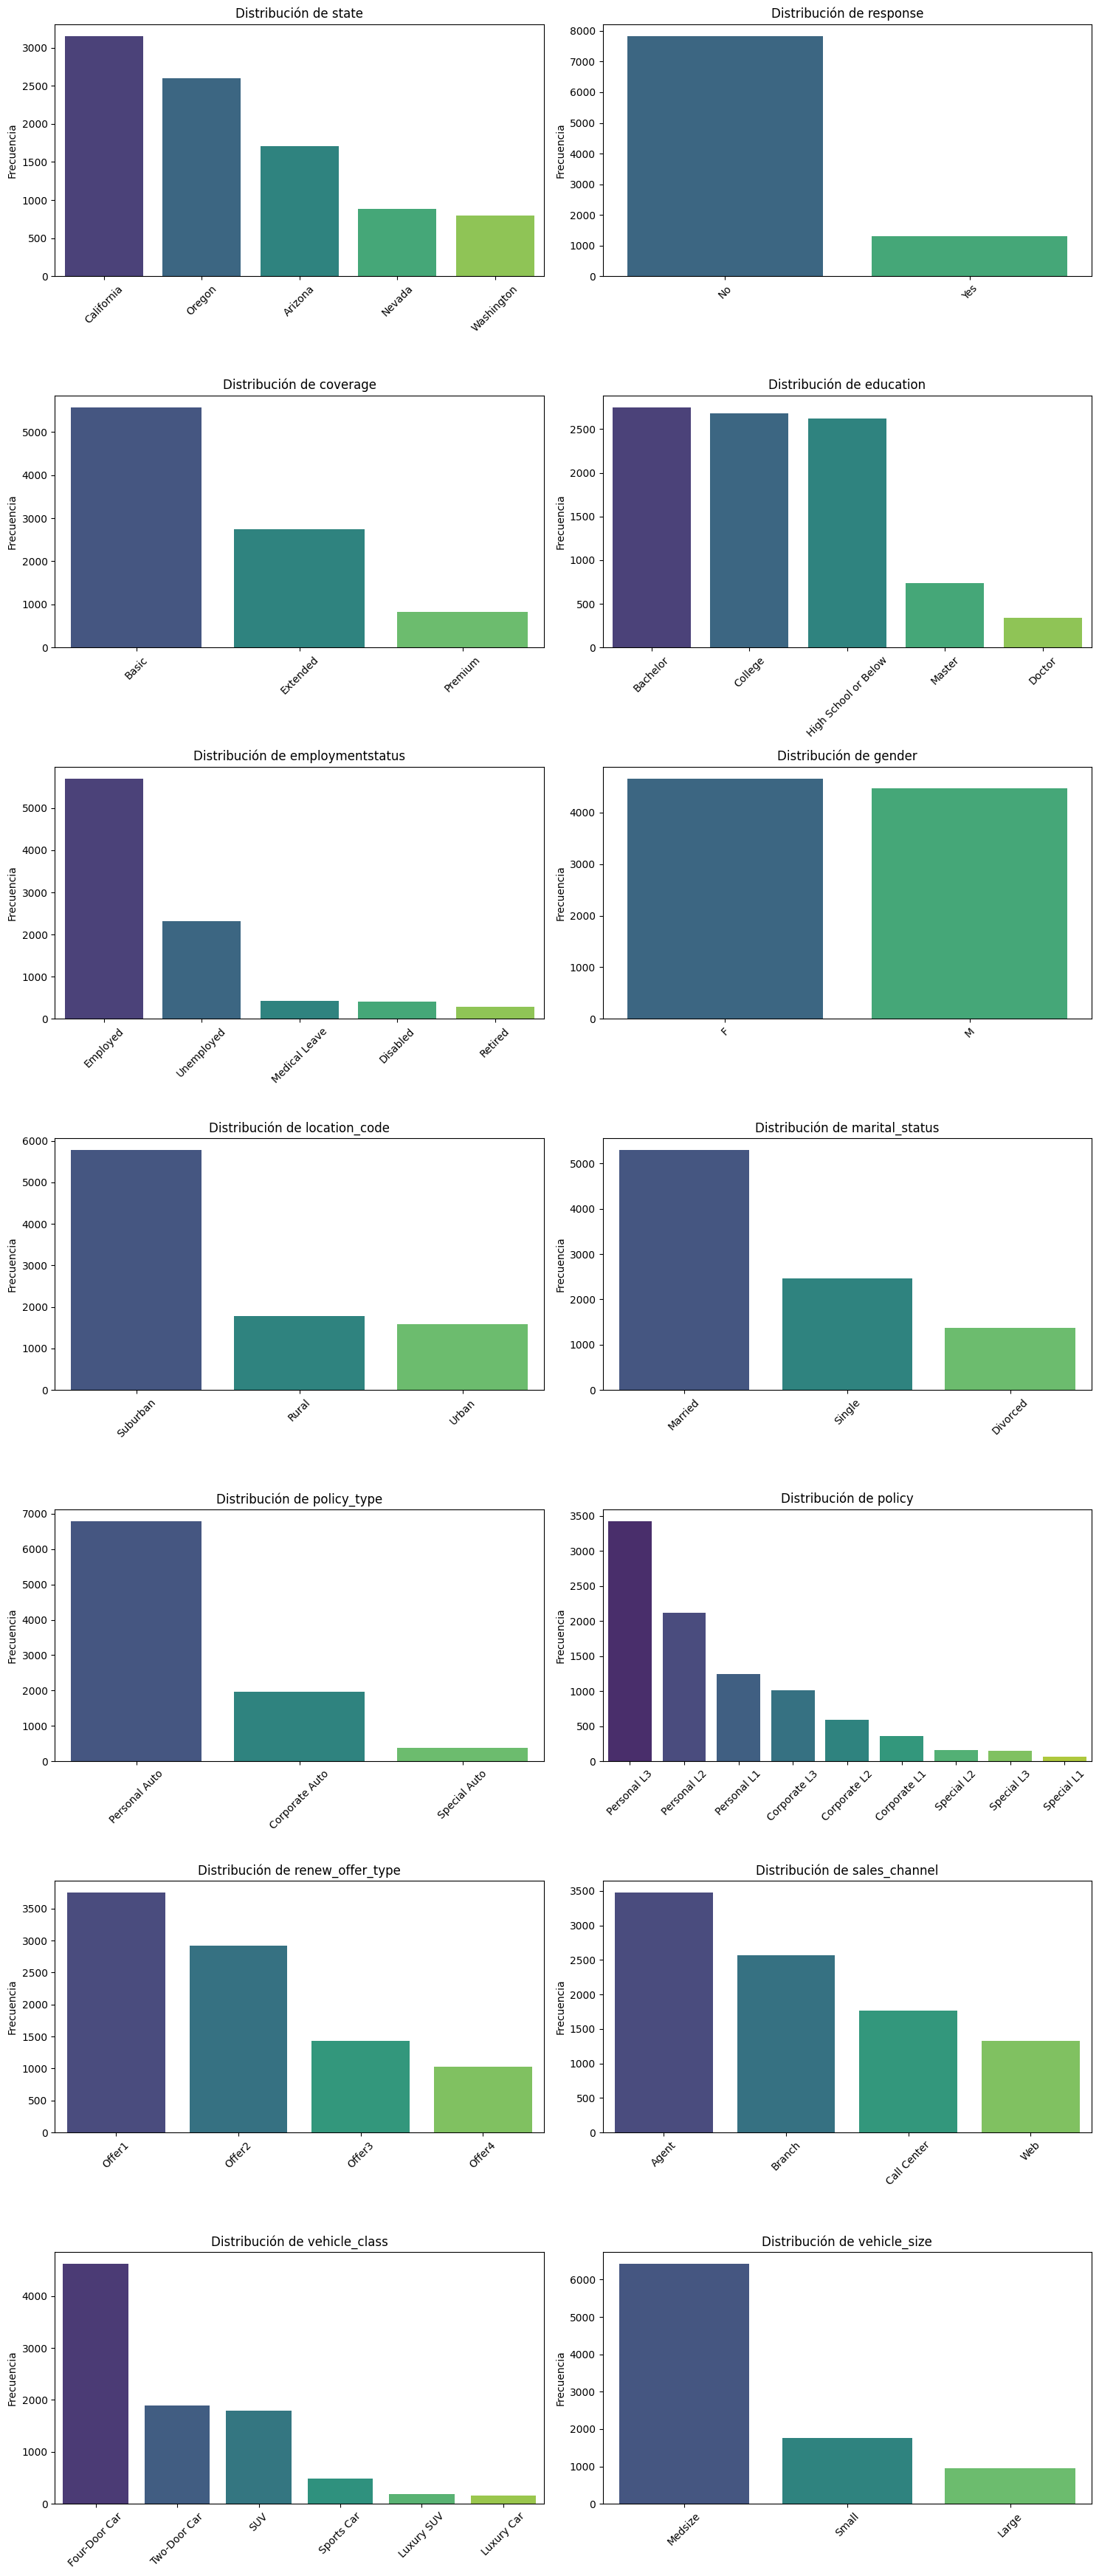

In [29]:
pinta_distribucion_categoricas(df_seguros, categoricas_seguros)

Aquí ya es más visual y se pueden ver más cosas (siempre lo que destaque, lo que sobresalga y lo que no):

* Response que es una de las importantes, hay una importante diferencia entre No y Yes en favor del No. Claramente ya tenemos un punto destacado: Tenemos un claro desbalanceo en la respuesta a nuestras campañas de marketing ¿es aceptable?¿está en línea con el mercado?
* California y Oregon son los estados con más clientes, ¿son los estados con mayor CLV por cliente?¿como son las respuestas en dichos estados? 
* Claramente dominan los clientes con 4-puertas, ¿qué representa en términos de CLV, se mantiene esa dominancia?

Y luego seguiría analizando en orden descendente según la importancia que establecimos en los primeros pasos, probablemente centrándome en las demográficas porque así lo pidieron desde dirección e importante relacionandolo con nuestras variables directoras o target.

Antes de seguir, observa que con esas escalas a veces es difícil estudiar o comparar los valores entre sí... Por eso la recomendación es pasar a frecuencias relativas, pero antes apliquemos todo lo anterior a nuestro segundo caso.

#### Caso 2. Viajes: Frecuencias absolutas

Primero en modo dejarse la vista:

In [30]:
for catego in variables_categoricas_viajes:
    print(f"Para {catego}")
    print(df_air_jun[catego].value_counts())
    print("\n" *2)

Para aircompany
aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64



Para origen
origen
Bali           87
Ginebra        85
Nueva York     71
Cincinnati     70
Londres        63
París          48
Melbourne      47
Los Angeles    45
Roma           37
Cádiz          29
Barcelona      18
Name: count, dtype: int64



Para destino
destino
Ginebra        82
Cincinnati     78
Bali           66
Londres        63
París          63
Nueva York     63
Roma           53
Melbourne      43
Los Angeles    40
Cádiz          35
Barcelona      14
Name: count, dtype: int64



Para avion
avion
Boeing 747     183
Airbus A380    165
Boeing 737     151
Airbus A320    101
Name: count, dtype: int64



Para con_escala
con_escala
False    396
True     204
Name: count, dtype: int64





Y hagamos el análisis sobre la presentación visual

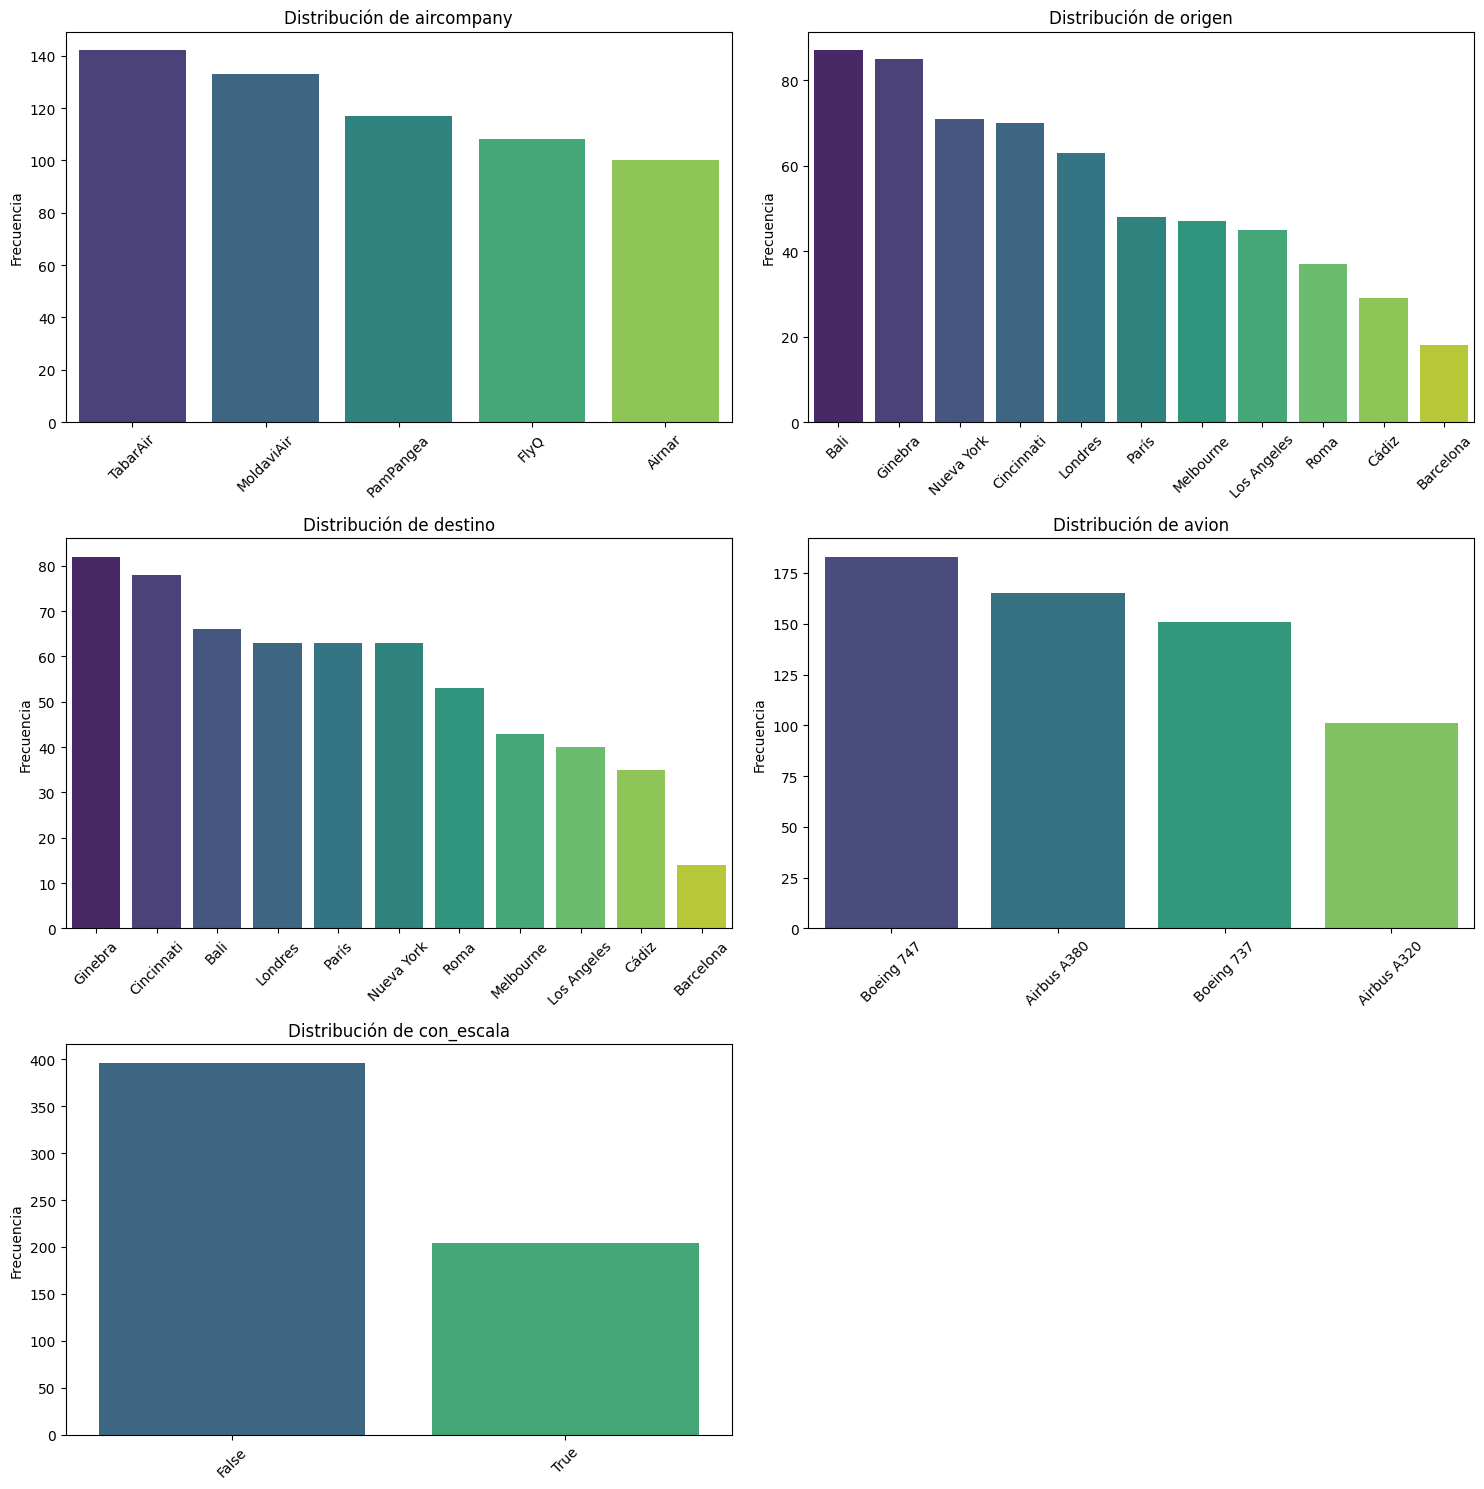

In [31]:
pinta_distribucion_categoricas(df_air_jun, variables_categoricas_viajes)

Así rápidamentes ya podríamos destacar:
* Barcelona como origen y destino infrautilizado, ¿podríamos sugerir aumentar el número de vuelos aquí? ¿por qué no lo hemos hecho ya? ¿Qué rentabilidad tiene este destino?¿Qué consumo? (Asociarlo a nuestras variables importantes)
* El Airbus 320 es el avión con menos utilización. ¿Qué ingresos tiene?¿Qué consumo?
* Airnar es la compañía con menor número de vuelos, TabarAir parece dominar. ¿Se mantiene este liderazgo proporcionalmente a los ingresos?¿Y al consumo?

Además de ver lo destacado, lo tenemos que ligar con nuestras variables directoras o targets. (Suponiendo que nos gusten esas que elegimos al principio)

### Frecuencia Relativa

Igualmente también podemos calcular la **frecuencia relativa** de cada conteo con respecto al total de valores de la muestra, de esta manera comprobamos la proporción de cada valor, lo que muchas veces facilita las comparaciones.

#### Caso 1. Seguros: Frecuencia relativa (Porcentaje)


In [32]:
for catego in categoricas_seguros:
    print(f"Para {catego}")
    print(df_seguros[catego].value_counts()/len(df_seguros)*100)
    print("\n" *2)

Para state
state
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: count, dtype: float64



Para response
response
No     85.679877
Yes    14.320123
Name: count, dtype: float64



Para coverage
coverage
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: count, dtype: float64



Para education
education
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: count, dtype: float64



Para employmentstatus
employmentstatus
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: count, dtype: float64



Para gender
gender
F    50.996278
M    49.003722
Name: count, dtype: float64



Para location_code
location_code
Suburban    63.269104
Rural       19.410992
Urban       17.319904
Name: count, d

Y como antes, es mejor visualizar (aunque en este caso tener los número es interesante):


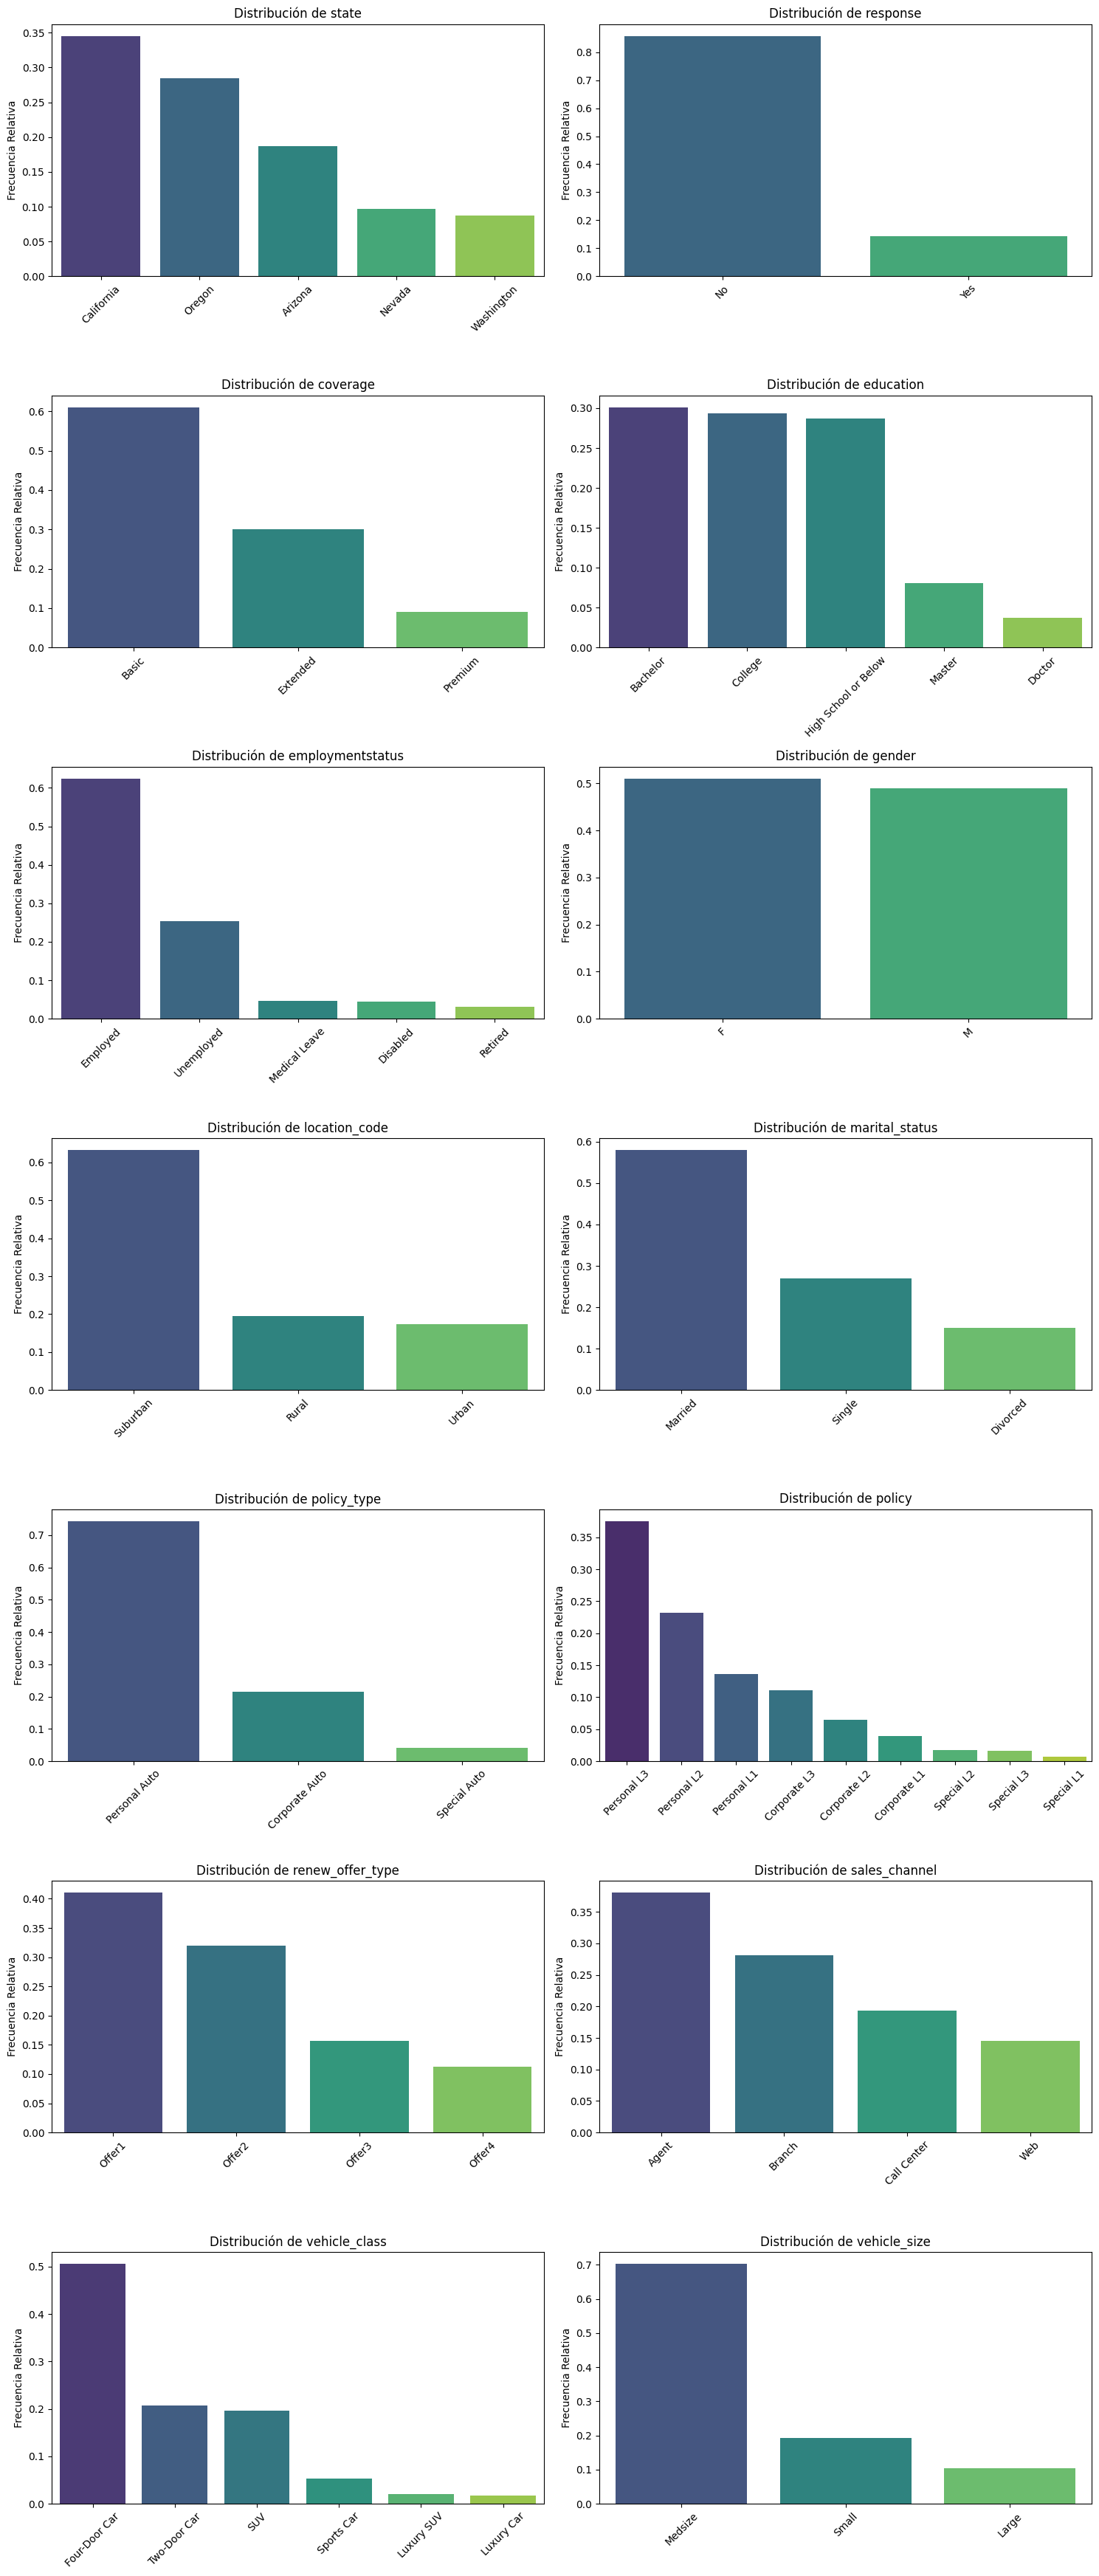

In [33]:
pinta_distribucion_categoricas(df_seguros,categoricas_seguros, relativa = True)

Observa las gráficas e intentar hacer una pequeña lista de cosas que sería interesante investigar al hilo de las preguntas que nos hicieron. Algunas de mis sugerencias:
* Respuesta, 14% vs 86%. ¿Qué segmento o conjunto de segmentos responde mejor?¿Qué segmento o conjunto de segmentos responde peor? ¿Que oferta es la mejor "atendida"? ¿Va en consonancia con la distribución de ofertas realizadas?
* Respuesta y CLV por Estado, respuesta y CLV por estado civil, respuesta y CLV por situación laboral. En estas tres hay una cierta dominancia, se mantiene en términos de CLV y respuesta (respuesta siempre hace referencia a la variable de respuesta a las campañas de renovación). A

#### Caso 2. Viajes: Frecuencia relativa


Para terminar, te dejo aquí repetido el ejercicio para el dataset de viajes, con mis conclusiones, revísalo y comprueba si te surgen otras o no te convencen las mías. [En la siguiente píldora empezaremos con las diversas formas de ver la dispersión y/o distribución de valores pero en el caso de variables numéricas]

In [34]:
for catego in variables_categoricas_viajes:
    print(f"Para {catego}")
    print(df_air_jun[catego].value_counts()/len(df_seguros)*100)
    print("\n" *2)

Para aircompany
aircompany
TabarAir      1.554631
MoldaviAir    1.456098
PamPangea     1.280928
FlyQ          1.182395
Airnar        1.094811
Name: count, dtype: float64



Para origen
origen
Bali           0.952485
Ginebra        0.930589
Nueva York     0.777316
Cincinnati     0.766367
Londres        0.689731
París          0.525509
Melbourne      0.514561
Los Angeles    0.492665
Roma           0.405080
Cádiz          0.317495
Barcelona      0.197066
Name: count, dtype: float64



Para destino
destino
Ginebra        0.897745
Cincinnati     0.853952
Bali           0.722575
Londres        0.689731
París          0.689731
Nueva York     0.689731
Roma           0.580250
Melbourne      0.470769
Los Angeles    0.437924
Cádiz          0.383184
Barcelona      0.153273
Name: count, dtype: float64



Para avion
avion
Boeing 747     2.003503
Airbus A380    1.806437
Boeing 737     1.653164
Airbus A320    1.105759
Name: count, dtype: float64



Para con_escala
con_escala
False    4.335450
True    

Desde la perspectiva visual:

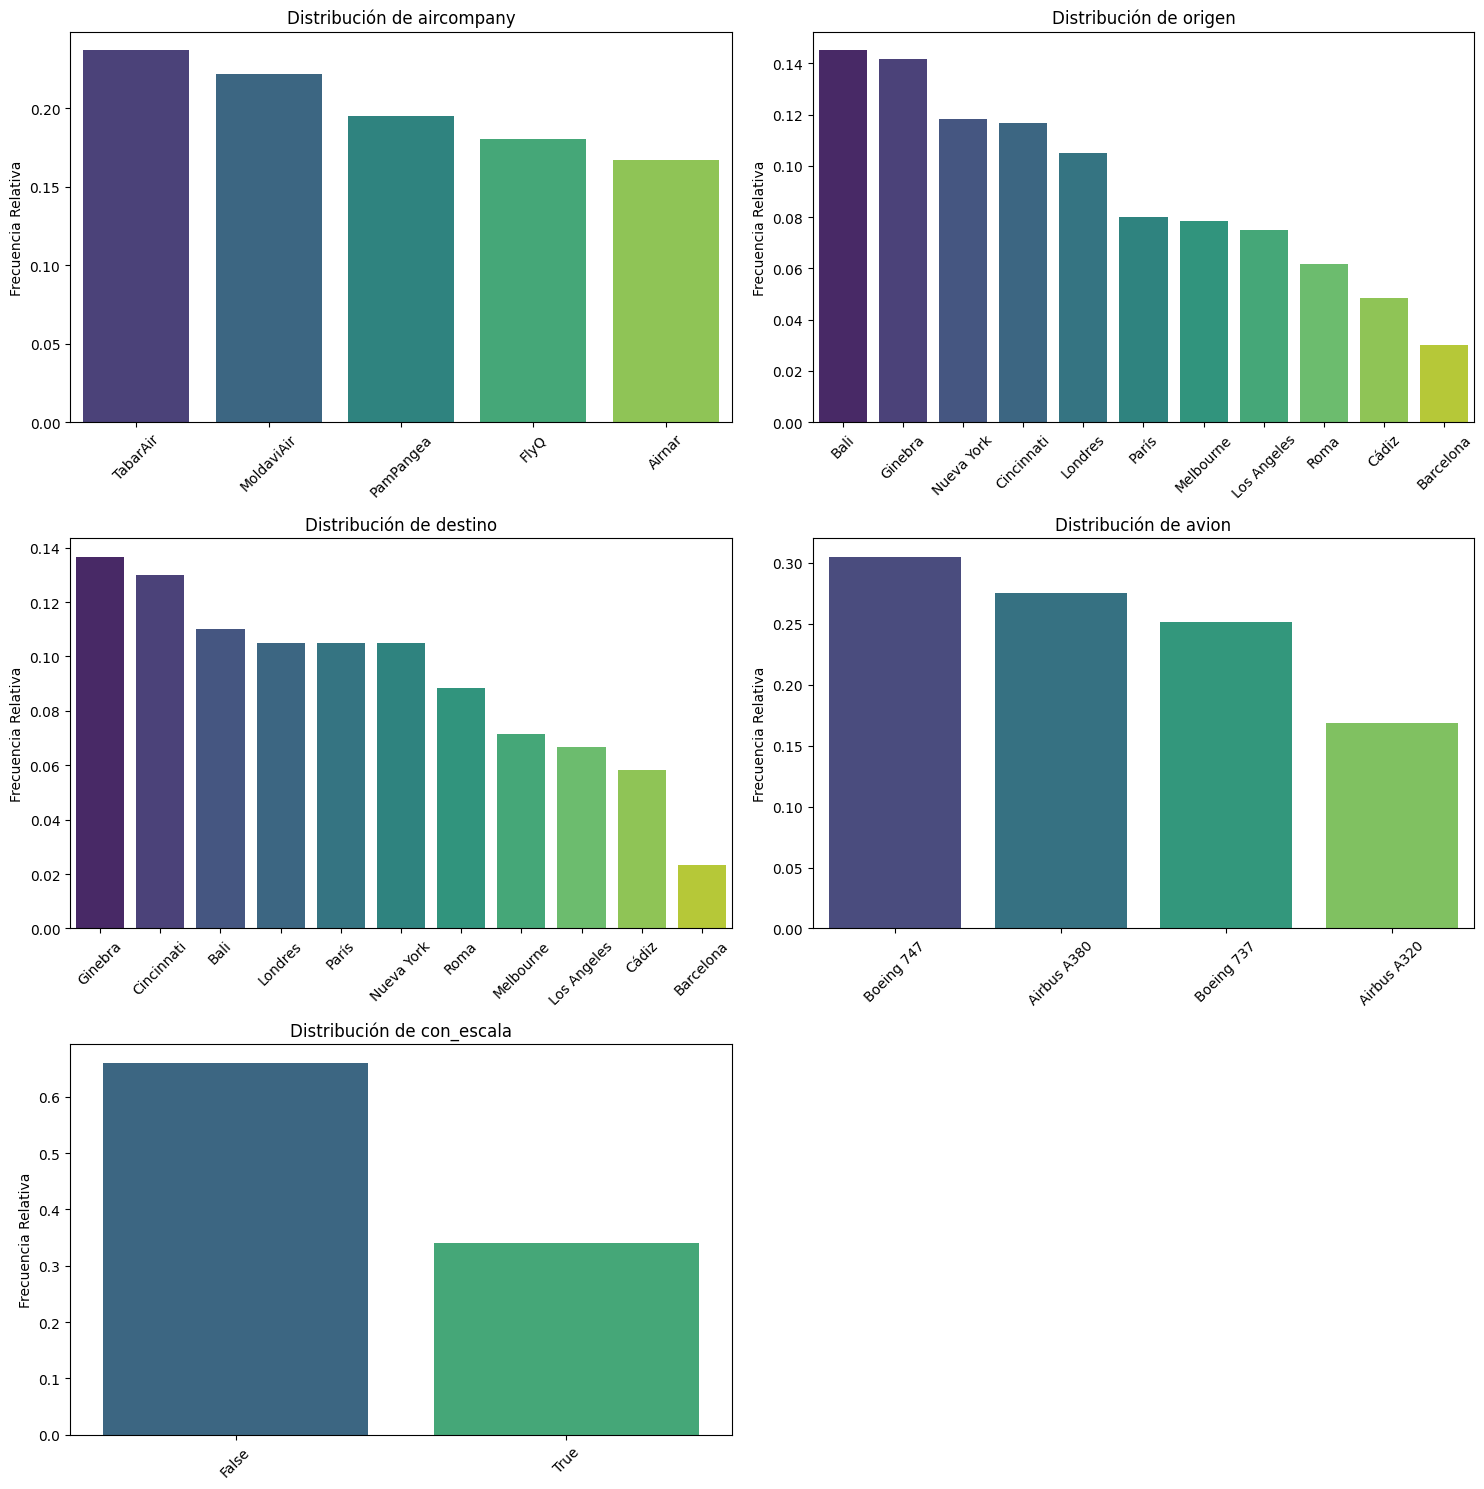

In [35]:
pinta_distribucion_categoricas(df_air_jun, variables_categoricas_viajes, relativa= True)

Preguntas para el análisis multivariante/bivariante, en general repetidas a las de las frecuencias absolutas:
* ¿Cómo es la proporción de ingresos y consumo por compañía comparada con su distribución en viajes? Es alguna empresa más rentable que otra en términos relativos (hace menos viajes pero ingresa más por viaje o consume menos)
* ¿Mantienen Bali y Ginebra su proporción en ingresos frente a Barcelona, por ejemplo, como la que se muestra en viajes a y desde? (Casi 30 veces más)
* ¿Cómo es la distribución de ingresos y consumo por avión? Justifica esa diferencia en el uso o hay otras razones. 
...


## Análisis de Datos: Medidas de posición y rangos

Igual que vimos las frecuencias para poder analizar la distribución de datos categóricos nominales y binarios, empezamos con esta sesión las dedicadas a analizar hasta cierto punto la distribución y dispersión de los datos numéricos y ordinales. Empecemos con el concepto de percentil, después de cargar nuestros datos y librerías:


In [36]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [37]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()



### Percentil
El percentil es el valor que divide un conjunto ordenado de datos estadísticos de forma que un porcentaje de tales datos sea inferior a dicho valor.

**Teniendo la variable ordenada en sentido ascendente, el percentil representa el orden relativo de cada valor respecto al resto de variables.**

Por ejemplo, si en una clase hay 100 alumnos, y en un examen solo tenemos 4 personas que hayan sacado mejor nota que nosotros, estaremos en el percentil 95%. De la misma manera el percentil 20% lo marcaría la nota por debajo de la cual se encuentra el 20% de la case.

Considerando nuestros ejemplos, el percentil 45%, por ejemplo de los ingresos de los viajes sería el valor de ingresos por debajo del cual estarían el 45% de los viajes. Y el percentil 73, o 73%, del CLV de los seguros sería ese valor que no superará el CLV del 73% de los clientes. 

Para calcular el percentil 20% en el ejemplo de las notas hay que ordenar la variable de forma ascendente y buscar al alumno 20 ordenado de esa forma, su nota será la que marque ese percentil. Y esto es así porque son 100 claro, si fueran 200, el percentil veinte lo marcaría la nota del alumno en la posición 40, ordenados por notas de menor a mayor, etc, etc.


Por cierto, si recuerdas, la mediana es equivalente al percentil 50.

En pandas tenemos el método `quantile` para calcular los percentiles y en numpy la función `percentile`.

Por ejemplo si quiero el grado de dispersión en el CLV de los seguros, donde sé que la media y la mediana se separan entre otras cosas por que el valor máximo es muy alto, puedo acudir a ver los percentiles siguientes:

In [38]:
print(df_seguros["customer_lifetime_value"].quantile(0.5),
    df_seguros["customer_lifetime_value"].quantile(0.9), 
      df_seguros["customer_lifetime_value"].quantile(0.95),
     df_seguros["customer_lifetime_value"].max())


5780.182197 15433.385306000006 22064.3612665 83325.38119


### Quartiles
Los **[cuartiles](https://es.wikipedia.org/wiki/Cuartil)** son los tres valores de la variable estadística que dividen a un [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos) ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes a **los percentiles 25%, al 50% y al 75% de los datos**. Q2 coincide con la <a href="https://es.wikipedia.org/wiki/Mediana_(estad%C3%ADstica)">mediana</a>.

Podemos obtener los valores de los cuartiles utilizando los métodos y funciones comentados de pandas y numpy, pero también directamente del método `describe`.

In [39]:
df_air_jun.describe()

,distancia,consumo_kg,duracion,ingresos
count,600.000000,600.000000,600.000000,6.000000e+02
mean,8071.003333,68240.520508,635.873333,4.187689e+05
std,5550.244086,67441.849592,450.474786,3.182858e+05
min,344.000000,835.920000,42.000000,1.179785e+04
25%,3073.000000,15733.520400,224.000000,1.627668e+05
50%,6877.000000,36033.998000,542.000000,3.754817e+05
75%,12553.000000,111717.652800,876.000000,6.188420e+05
max,20029.000000,264876.314560,1721.000000,1.295516e+06


Los cuartiles son los que normalmente se usan para ver a través de números un cierto grado de dispersión en concreto se usa un concepto denominado "rango intercuartílico" o `IQR` que es la diferencia entre el percentil 75% y el percentil 25% y,por tanto es un rango de valores entre los que se encuentra el 50% de los valores que no están en un extremo ni en el otro.

Creemos una sencilla función que dado un dataframe y una columna nos diga su indice intercuantílico:

In [40]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [41]:
get_IQR(df_seguros,"customer_lifetime_value")

4967.915247000001

Y eso ¿es mucho o poco? Pues... depende... varias formas de aplicarlo:
* Si el IQR es mucho mayor que la mediana (por ejemplo más de un 50%) podríamos pensar en una variable con valores bastante dispersos (y por tanto las medidas de tendencia central hay que considerarlas con más cuidado)
* Podemos comparar el IQR con la diferencia entre valor máximo y mínimo (lo que veremos en un momento que es el rango) y si el IQR es comparable entonces de nuevo podremos hablar de una variable dispersa.

En el caso del CLV:


In [42]:
df_seguros["customer_lifetime_value"].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

Si comparamos ni el IQR es mayor que la mediana, ni es una proporción importante del rango (más de 82K$), no es el CLV una variable dispersa, pero sí que tiene valores potencialmente anómalos pero eso lo veremos en otras sesiones. Ahora para casi terminar veamos la forma visual de analizar los cuartiles, la dispersión y en el futuro las anomalías de valores numéricos.

###  Diagramas de caja
Los [diagramas de cajas](https://es.wikipedia.org/wiki/Diagrama_de_caja) son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico) y comparar dos [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos). 


<img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" width="500" height="550">


Por cierto a las líneas entre la caja y los valores "Minimum" y "Maximum" (ojo que no son el min y el max) se le denomina también "bigotes". Cuanto más alargada la caja o más largos los bigotes más dispersos son los valores de la variable pintada. Los valores que quedan por debajo del minimum y del maximum son considerados outliers o anomalías. [Como hemos comentado antes lo veremos en las sesiones finales de la unidad]. 

Antes de aplicarlo a los dos casos (esta vez he preferido no hacerte pasar por la versión numérica de los valores de posición), simplemente comentar que usaremos los boxplot:
1. Para **comparar series de valores entre sí** por ejemplo como son las distribuciones de CLV para cada tipo cliente según su estado.
2. Para **detectar valores anómalos** o outliers.

Cada uno de estos puntos los veremos en su correspondiente sesión. Ahora pintemos diagramas de cajas.

#### Caso 1. Seguros: Percentiles y BoxPlots

In [43]:
# Primero necesitamos las columnas numéricas:
columnas_numericas_customers = [
    "customer_lifetime_value",
    "income",
    "monthly_premium_auto",
    "months_since_last_claim",
    "months_since_policy_inception",
    "number_of_open_complaints",
    "number_of_policies",
    "total_claim_amount"
]
columnas_numericas_customers = df_seguros.describe().T.index.to_list() # Esto te saca las columnas numericas directamente
print(columnas_numericas_customers)


['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


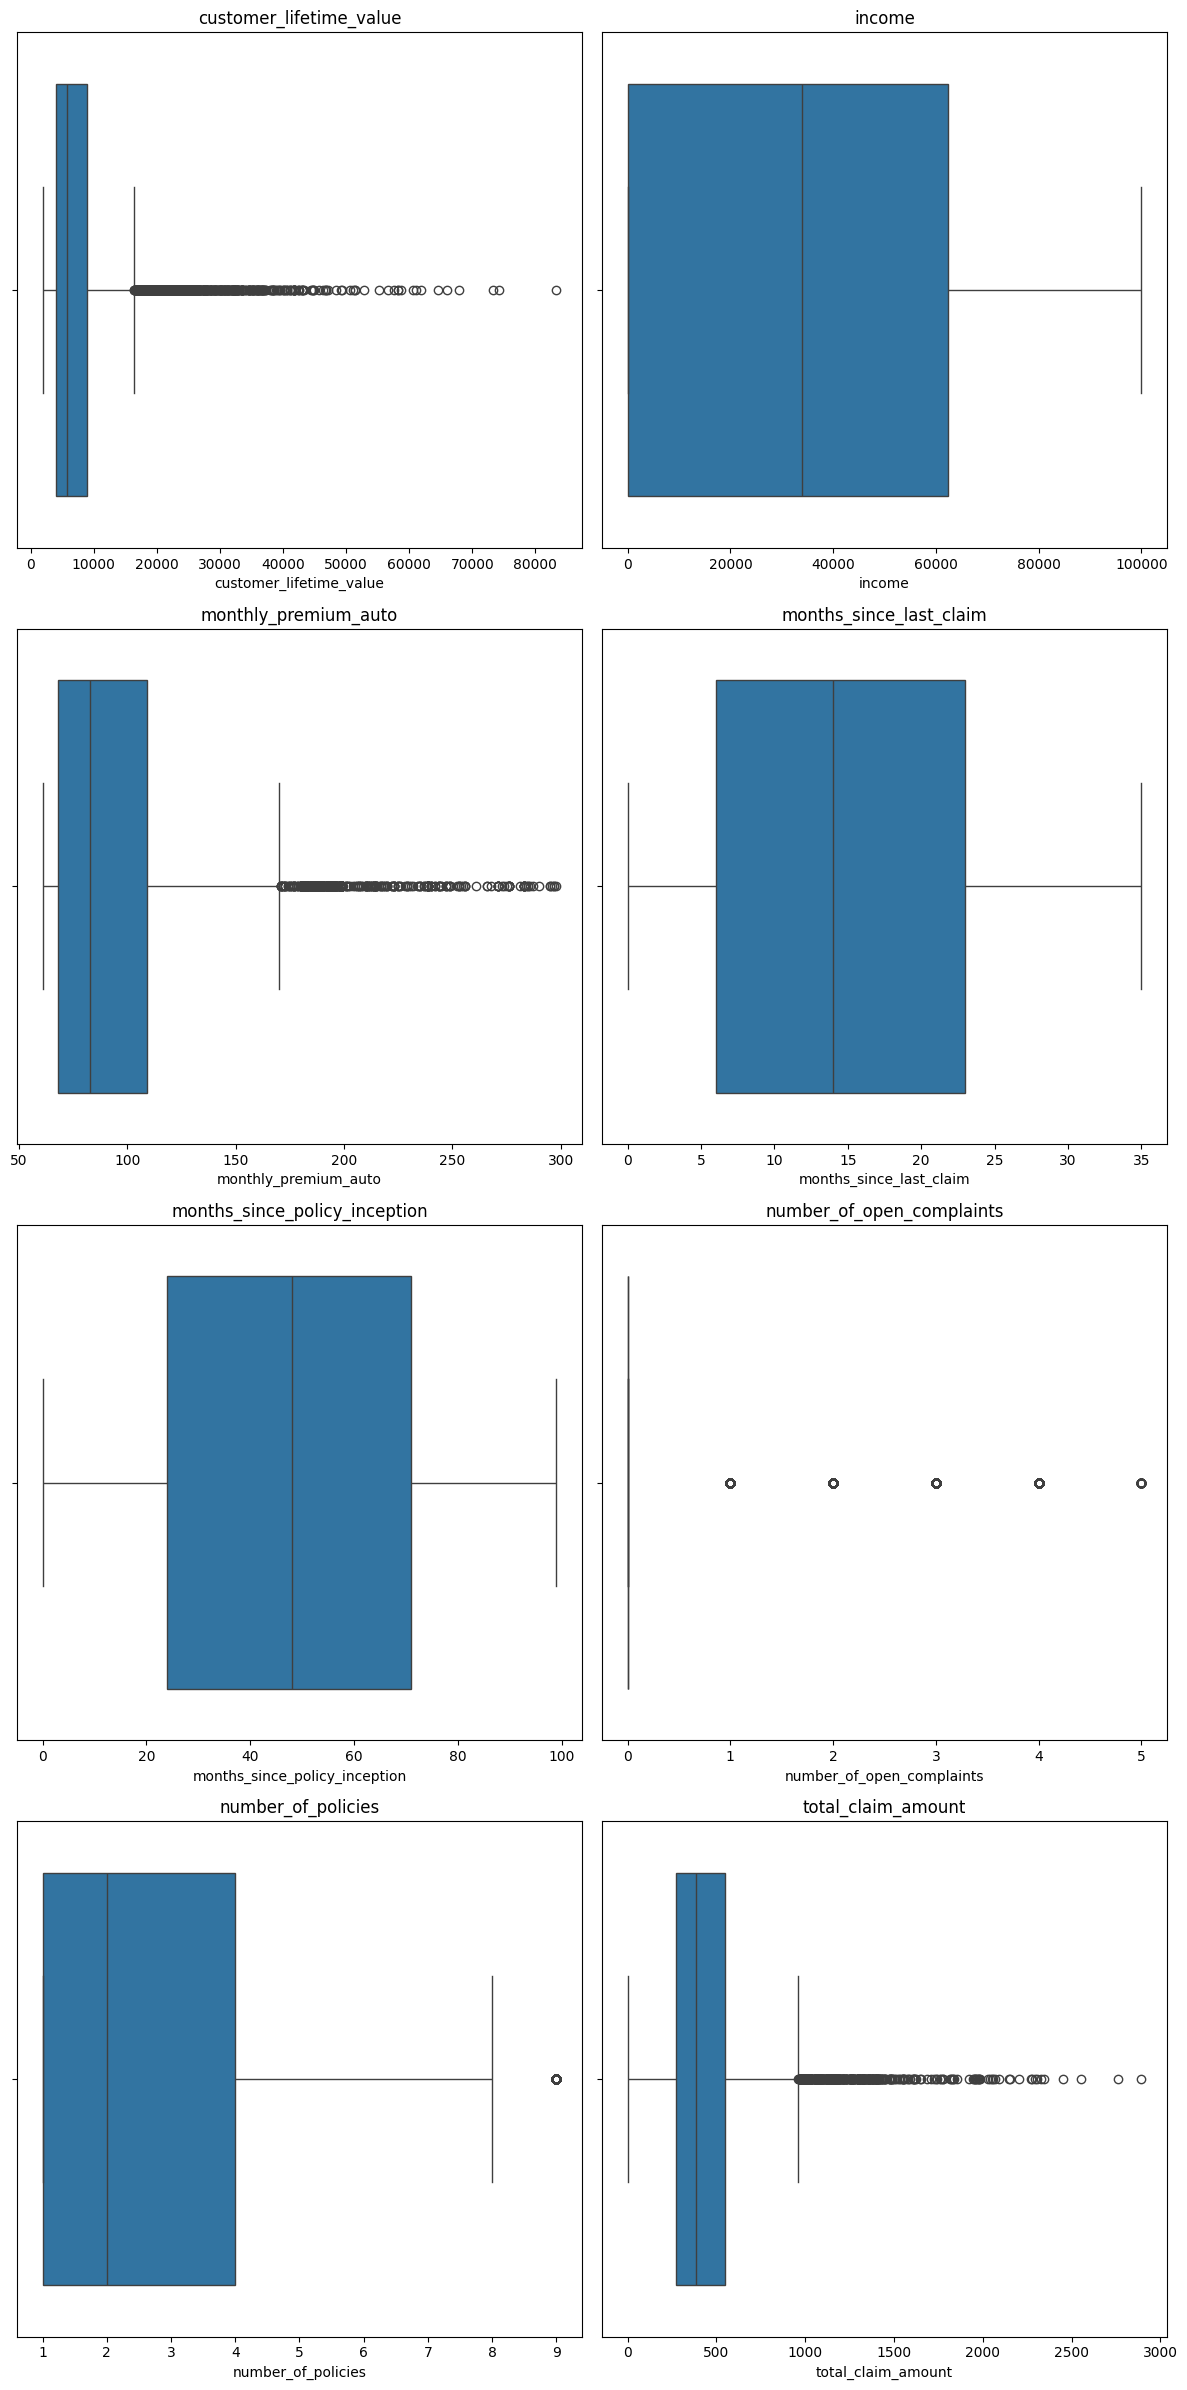

In [44]:
plot_multiple_boxplots(df_seguros, columnas_numericas_customers)

¿Qué observas?
- En general no parecen variables muy dispersas, pero más sobre eso en la siguiente píldora, pero sí que hay al menos un par de ellas con bastantes valores anómalos CLV, total_claim_amount y monthly_premium_alto.
- Dado que una de ellas es una de las variables directoras, tendremos que tenerlo en cuenta para analizar mejor esa distribución y esos valores anómalos antes de comparar CLV con el resto de variables demográficas y categóricas.

Por cierto, te dejo (a modo de Teaser/anticipo para la siguiente unidad) un ejemplo de como se distribuye CLV, sin tocar, entre clientes que responden que sí y no a las ofertas de marketing:

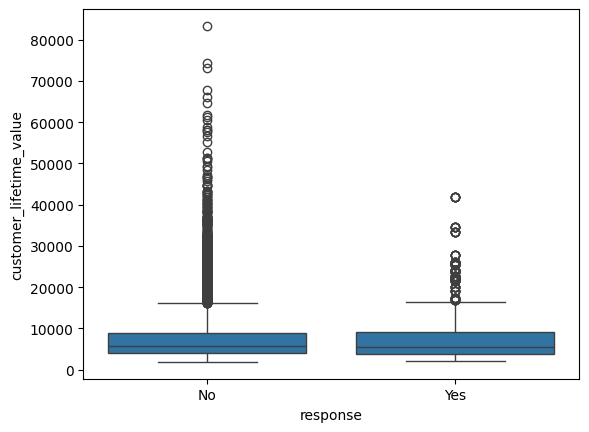

In [45]:
plot_boxplot_grouped(df_seguros, "customer_lifetime_value", "response")

#### Caso 2. Viajes: Boxplots

Esta aplicación y su análisis la tendrás como ejercicio de esta unidad.

### Rangos

Para terminar, un tema sencillo, obtener los rangos de cada varible numérica, es decir hacer la diferencia entre su valor máximo y su valor mínimo:

In [46]:
df_seguros.describe().loc["max"] - df_seguros.describe().loc["min"]

customer_lifetime_value          81427.373515
income                           99981.000000
monthly_premium_auto               237.000000
months_since_last_claim             35.000000
months_since_policy_inception       99.000000
number_of_open_complaints            5.000000
number_of_policies                   8.000000
total_claim_amount                2893.140671
dtype: float64

In [47]:
df_air_jun.describe().loc["max"] - df_air_jun.describe().loc["min"]

distancia     1.968500e+04
consumo_kg    2.640404e+05
duracion      1.679000e+03
ingresos      1.283718e+06
dtype: float64

En ambos casos los rangos nos sirven más para comparar y como referencia que como un dato a analizar de primeras. 


## Análisis de Datos: Dispersión de variables numéricas

Para saber si los datos están muy dispersos o se concentran en torno a un valor (caso en el que una de las medidas centrales como la media o la mediana los representarán muy bien), hemos visto ya los percentiles y el rango para hacernos una idea, pero en general lo que se emplea en el caso de los valores numéricos son dos medidas, relacionadas entre sí, y luego métodos visuales basados en dos tipos de gráficas: los histográmas y las graficas de función de densidad de probabilidad [Aunque a esta parte le dedicaremos la siguiente píldora]

Vamos a verlos y a aplicarlos a nuestros dos casos de uso de ejemplo. Para ello, ya sabes, ejecuta las siguientes celdas:

### Medidas de dispersión o variabilidad: Varianza


La [varianza](https://es.wikipedia.org/wiki/Varianza) es la media aritmética del cuadrado de las desviaciones respecto a la media de un conjunto de datos (por ejemplo los valores de una de nuestras variables o columnas y, en general, una distribución estadística). La varianza intenta describir la dispersión de los *[datos](https://es.wikipedia.org/wiki/Dato). Básicamente representa lo que varían los datos*. **Como está elevada al cuadrado, la varianza no puede tener las mismas unidades que los datos**. 

Una varianza elevada significa que los datos están más dispersos. Mientras que un valor bajo, indica que los datos están próximos a la media. Se representa como $\sigma^2$. 
$$\sigma^2 = \frac{\sum\limits_{i=1}^n(x_i - \mu)^2}{n} $$




INCISO: Y por qué está elevado al cuadrado te preguntarás: Porque no quiero que las diferencias positivas y negativas se compensen. Piensa en esta serie de datos:
  
[-104,100,102,0,-100,120,-119]

La media es: 

$$\mu = \frac{1}{n} \sum_{i}x_i = \frac{(-104 + 100 + 102 + 0 -100 + 120 - 119)}{7} = \frac{-1}{7} \approx -0.14$$

Si no elevaramos al cuadrado y aplicaramos:


$$\sigma^2 = \frac{\sum\limits_{i=1}^n(x_i - \mu)}{n} $$


El denominador sería:

$$\sum\limits_{i=1}^n(x_i - \mu) = (-104 - 0.14) + (100 - 0.14) + (102 - 0.14) + (0 - 0.14) + (-100 - 0.14) + (120 - 0.14) + (-119 - 0.14) = -1.98$$


Y al dividirlo se nos quedariá en un grado de dispersión de 0.28 que no es real (fíjate que el rango como tal es 239), para que no se compensen las diferencias se elevan al cuadrado.


Y la varianza según la definición de ese conjunto de datos es:

$$\sigma^2 \approx 9968.69$$



En vez de aplicarla a los datos veamos la versión comparable (es decir medida en las mismas unidades que los datos que estamos analziando) que es la desviación estándar

### Medidas de dispersión o variabilidad: Desviación estándar

La [desviación típica](https://es.wikipedia.org/wiki/Desviaci%C3%B3n_t%C3%ADpica) es la raíz cuadrada de la varianza. Se representa con la letra griega $\sigma$.
$$\sigma = \sqrt{\frac{\sum\limits_{i=1}^n(x_i - \mu)^2}{n}} $$

Una ventaja que presenta la desviación estándar sobre la varianza es que se expresa en unidades de la variable en cuestión.

¿Y para qué nos sirven estas medidas?
* Nos dan una idea rápida de si los datos están dispersos (gte. compararemos la desviación con la media) y por tanto de si la media y mediana son buenos representantes de los valores o bien tenemos que trabajar la variable de otra forma, considerando rangos por ejemplo.
* Nos sirven para hacer cálculos posteriores y de otras medidas (que nos permitirán interpretar los datos de otras formas)

Podemos aplicar directamente el concepto de "Coeficiente de Variación" (CV) que es la división de la desviación estándar entre la media. Como pautas generales:

- Un CV menor al 15% suele considerarse como una baja variabilidad.
- Un CV entre 15% y 30% indica una variabilidad moderada.
- Un CV mayor al 30% a menudo se considera como una alta variabilidad.

Estos valores son orientativos y deben interpretarse en el contexto específico de tus datos y el área de estudio.

#### Caso 1. Seguros: Dispersión

En general fijate en la desviación y de nuevo la podemos obtener del método describe():


In [48]:
df_seguros.describe().loc[["std","mean"]].T

,std,mean
customer_lifetime_value,6870.967608,8004.940475
income,30379.904734,37657.380009
monthly_premium_auto,34.407967,93.219291
months_since_last_claim,10.073257,15.097000
months_since_policy_inception,27.905991,48.064594
number_of_open_complaints,0.910384,0.384388
number_of_policies,2.390182,2.966170
total_claim_amount,290.500092,434.088794


Si obtenemos el coeficiente de variación:

In [49]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"] / df_var["mean"]
    return df_var

In [50]:
variabilidad(df_seguros)

,std,mean,CV
customer_lifetime_value,6870.967608,8004.940475,0.858341
income,30379.904734,37657.380009,0.806745
monthly_premium_auto,34.407967,93.219291,0.369108
months_since_last_claim,10.073257,15.097000,0.667236
months_since_policy_inception,27.905991,48.064594,0.580594
number_of_open_complaints,0.910384,0.384388,2.368397
number_of_policies,2.390182,2.966170,0.805814
total_claim_amount,290.500092,434.088794,0.669218


#### Caso 2. Viajes: Dispersión

In [51]:
variabilidad(df_air_jun)

,std,mean,CV
distancia,5550.244086,8071.003333,0.687677
consumo_kg,67441.849592,68240.520508,0.988296
duracion,450.474786,635.873333,0.708435
ingresos,318285.763970,418768.851500,0.760051


Nos ocurre algo parecido, en este caso probablemente sería más interesante hacerlo por compañía todo, pero eso lo veremos en la siguiente unidad. En cualquier caso tanto consumo (CV > 90%) como ingresos, nuestras variables directoras (o por lo menos las que nosotros hemos decidido que lo sean por ahora) necesitan que miremos sus distribuciones.

En ambos casos tenemos que ver qué "pinta" tienen los datos, nos nos vale con estas pistas de las métricas y ahí es donde entran nuestras dos siguientes herramientas: Los histogramas y las funciones de densidad.


## Análisis de Datos: Distribución de valores en variables numéricas

Nos quedamos en la sesión anterior en que era necesario poder "ver" cómo era esa dispersión de algunas de las variables importantes (y no tan directoras) de nuestro dataset. Para ello vamos a emplear los histogramas y (ahora en mucha menor medida) las funciones de densidad de probabilidad.

Pero antes ejecuta las siguientes celdas, en las que además de cargar los datos tienes una serie de funciones que te vendrán bien para hacer tus análisis [y que veremos como se construyen en el sprint siguiente cuando hablemos de visualización]:

In [52]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [53]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

### Distribución de valores: Histogramas
Los histogramas son la mejor herramienta para ver la forma, dispersión y tendencia central de los datos. Nos dan la frecuencia de aparición de cada valor de los datos. Ya los hemos empleado y comentado, pero hagámoslo otra vez:



<Axes: >

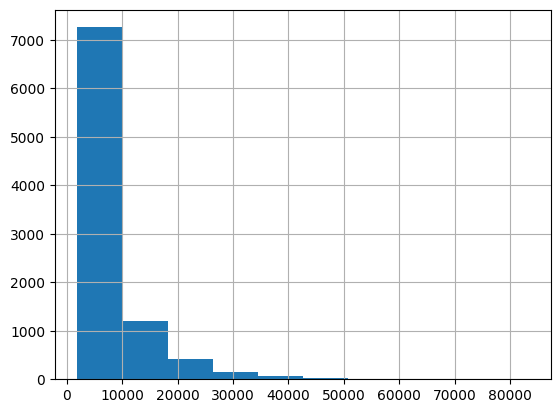

In [54]:
df_seguros["customer_lifetime_value"].hist()

Claramente existe una dispersión, pero fijate en otro dato que nos da el histograma, importante, **la distribución** de los valores, se concentran mucho en un rango inicial, y rápidamente decae la concentración y tenemos eso sí valores muy alejados que también se pierden por la escala (pero si recuerdas el boxplot de esta vairable, recordaras que había muchos valores extremos):

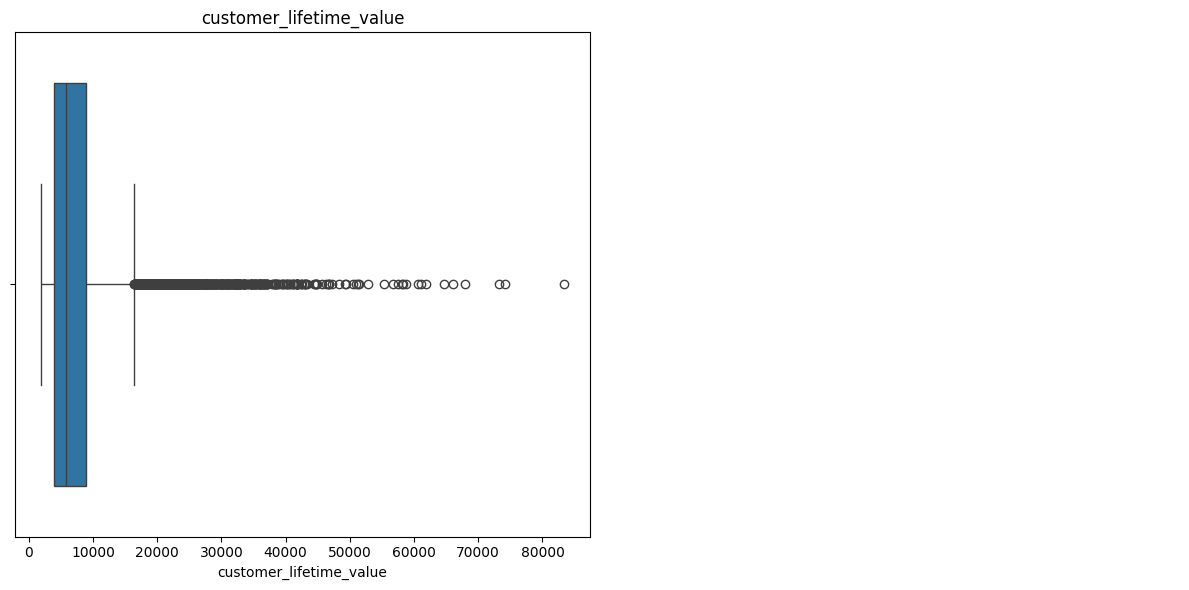

In [55]:
plot_multiple_boxplots(df_seguros, ["customer_lifetime_value"])

¿Y qué podemos hacer?
1. Analizar la variable filtrando los valores extremos.
2. En cualquier caso, parece interesante crearse una nueva variable categórica ordinal (con el *binning* que vimos en su momento) y emplearla para hacer una análisis más detallado por CLV (recuerda que es nuestra variable directora)
[Y me sigo apuntando estas cosas para mi continuación de EDA]

Este mismo análisis lo haría para todas las variables, pintar su histograma y ver si merece la pena hacer análisis por cortes filtrando los valores extremos o no (aunque esto lo haré después de analizar dichos valores)



Aunque más por su aportación futura que actual, vamos a introducir en la parte gráfica del análisis la función densidad de probabilidad

### Distribución de valores: Función densidad de probabilidad
Nos sirve para ver la forma que tiene una variable, así como la probabilidad de aparición de cada uno de sus valores. Este tipo de gráficos se utiliza para variables contínuas. Las vamos presentando porque: 

* Hay determinadas "formas" de esa función que cuando los datos las siguen podemos aplicar ciertas propiedas a los mismos (en especial con la distribucón normal, que veremos en la unidad siguiente)

* las emplearemos bastante más adelante ya que según la forma de esa función, podremos hacer transformaciones o tendremos que hacerlas para el modelado en sprints posteriores.

Vamos a mostar la función de densidad (estimada) para `customer_lifetime_value` (junto con su histograma, con mayor resolución):

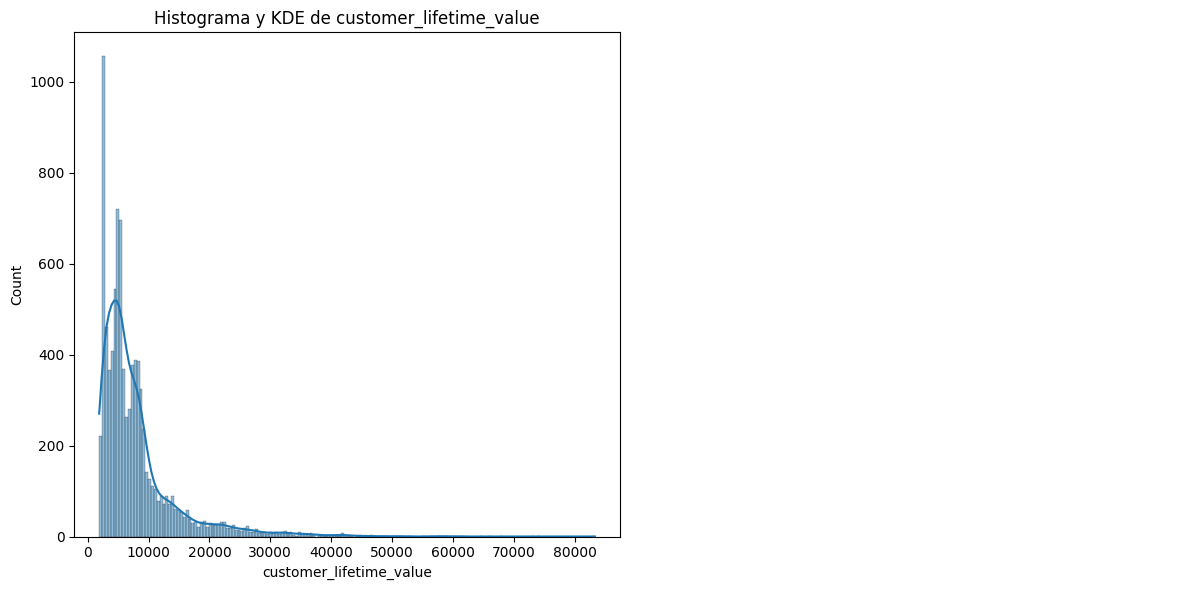

In [56]:
plot_histo_den(df_seguros,["customer_lifetime_value"])

Ahora con ese nivel no sólo queda más claro que existen posibles grupos sino que tenemos alguno especialmente significativo por la parte baja, no sólo todos esos valores en la "larga cola". 

Este gráfico además me sirve para combinar el análisis por histograma para saber a que tipo de función de densidad se podrían aproximar los datos de nuestra variable si fueran una serie estadística. Y de ahí aprovecharme de las propiedades de cada una (pero se escapa del ámbito del bootcamp). Lo que haríamos es comparar la forma a "ojo" (aunque existen mecanismos más rigurosos) y decidir si se parece a alguna de las siguietnes (sobre todo a la normal, que es la que también se llama gaussiana o campana de gauss):



Al final te dejo un pequeño anexo sobre histogramas y distribuciones por si quieres saber más.

Para nosotros la aproximación de la distribución cobrará importancia más adelante, pero ya es bueno que nos la llevemos puesta en nuestros análisis. 

De hecho ahora vamos a aplicar el análisis de histograma-densidad a nuestros casos de uso:

#### Caso 1. Seguros: Histogramas y densidades

Como hemos comentado este análisis nos servirá para decidir como tratar determinadas variables numéricas (segmentándolas o creando categorías) o incluso para mostrar alguna conclusión sobre ellas (por ejemplo sobre las vairables directoras)

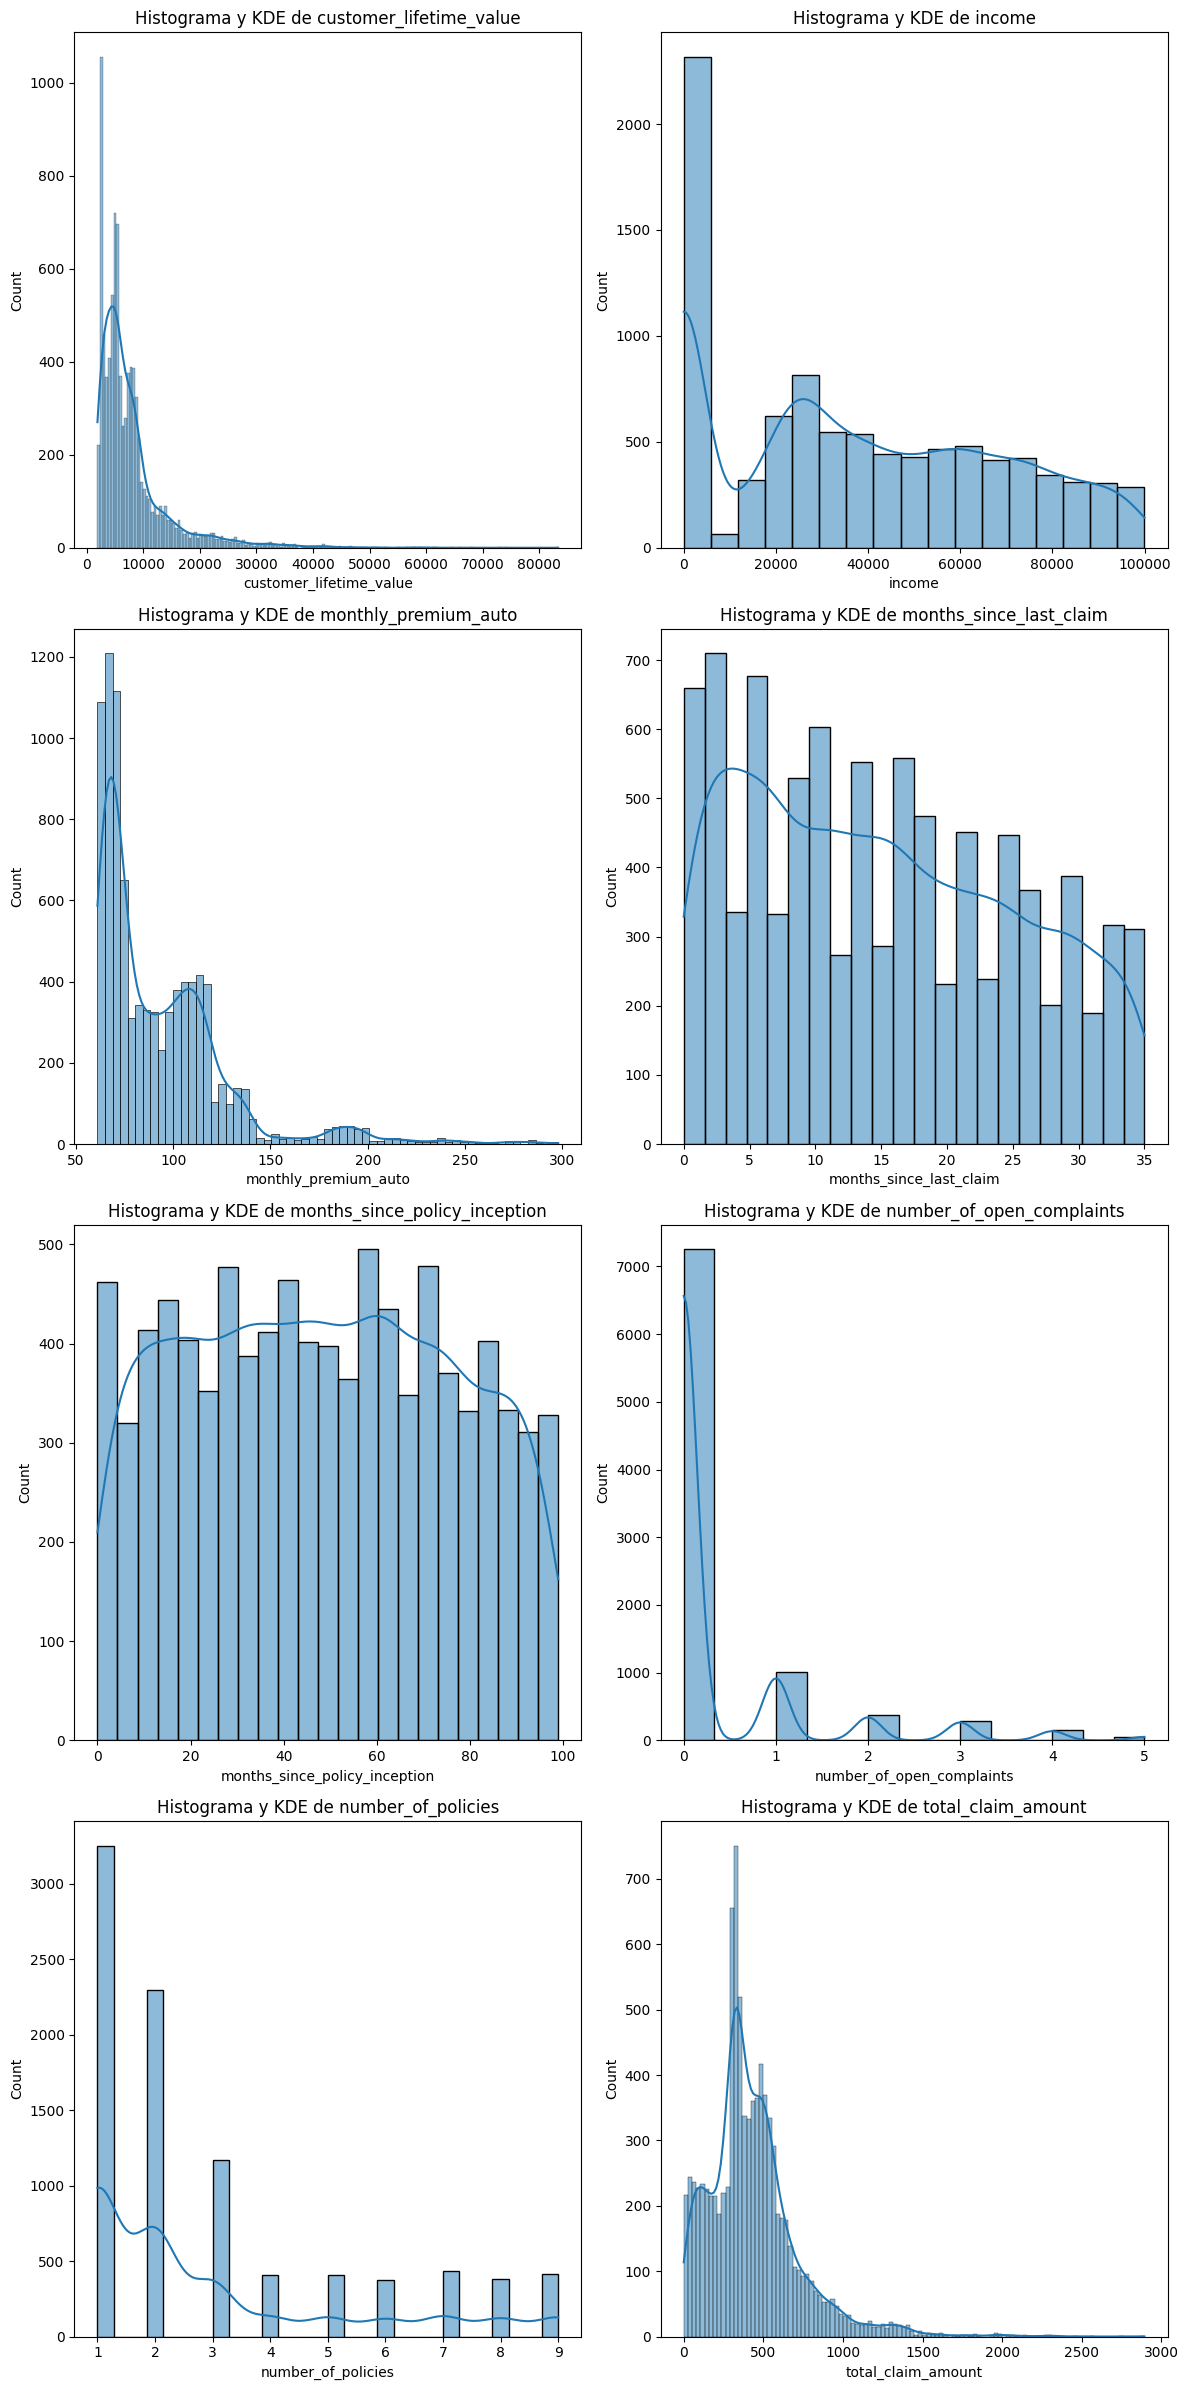

In [57]:
columnas_numericas = df_seguros.describe().columns.to_list()

plot_histo_den(df_seguros,columnas_numericas)

Una particularización que debemos tener en cuenta es que la función de distribución aplica a variables numéricas continuas, no debemos considerarlo en `number_of_policies` ni en `number_of_open_complaints`, ni las asociadas a meses.

Y ahora centrándonos en la variable directora (numérica), el customer_lifetime_value:
* Como ya habíamos visto tenemos que ver qué hacer con los valores extremos. En paralelo, yo vería que pinta tiene la distribución filtrando esos valores extremos. Y además ya miraría que valores son esos que tienen un claro pico en el histograma y lo tendría como un punto especial sobre el que llamar la atención o sobre el que informarme más (al igual que con el 14-86 de respuestas).  
* También haría una segmentación de clientes por nivel de income (donde hay una separación clara entre dos grandes grupos que analizaría por separado a la hora de compararlo con otras variables, en concreto con CLV y con respuestas) 
* Me apuntaría por si hay tiempo la posibilidad de abrir también un análisis por 3 grupos en función de la cantidad reclamada.
* Las curvas de CLV e Income tienen un cierto parecido que invita a estudiar su correlación (que por otro lado parece algo con cierto sentido, pero no necesariamente tiene que tenerlo)



#### Caso 2. Viajes: Histogramas y Densidad

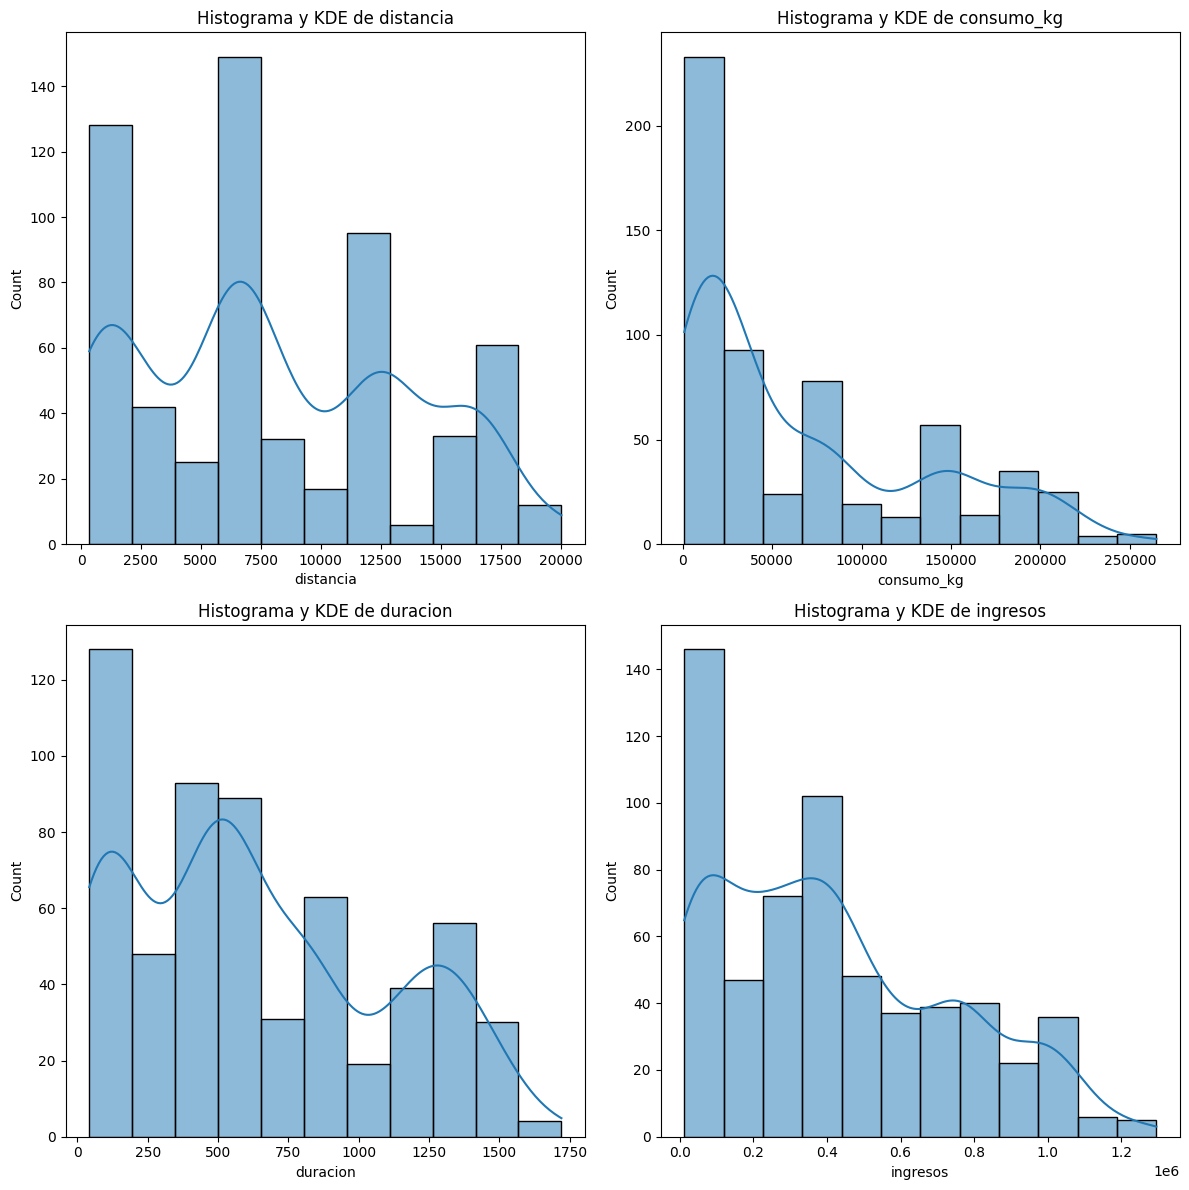

In [58]:
columnas_numericas = df_air_jun.describe().columns.to_list()

plot_histo_den(df_air_jun,columnas_numericas)

En este caso, para mí no se ve tan claro una posible segmentación (centrándome en las que marcamos como importantes a priori: ingresos y consumo, no veo claramente esa separacion y en esos casos prefiero dejarlas tal cual). Lo que si observo:
* Distancia podría segmentarla como ya hicimos en su momento y ver vuelos "internacionales","regionales","locales" o algo así. O incluso un cuarto nivel (fijate que son como cuatro "normales")
* Me interesa comparar en una parte de los ingresos con los consumos, porque parecen gráficas con valores que se distribuye similar pero hay una franja central "curiosa".

[Y eso es todo casi hemos terminado, nos queda ver la parte de las anomalías y hacer un pequeño resumen de lo que hemos visto para rematar la unidad, venga nos vemos]

## Anexo: Histogramas y Distribuciones

Muchas veces los indicadores de la *[estadística descriptiva](https://es.wikipedia.org/wiki/Estad%C3%ADstica_descriptiva)* no nos proporcionan una imagen clara de nuestros *[datos](https://es.wikipedia.org/wiki/Dato)*.  Por esta razón, siempre es útil complementarlos con gráficos de las distribuciones de los *[datos](https://es.wikipedia.org/wiki/Dato)*, que describan con qué frecuencia aparece cada valor. La representación más común de una distribución es un [histograma](https://es.wikipedia.org/wiki/Histograma), que es un gráfico que muestra la frecuencia o probabilidad de cada valor. El [histograma](https://es.wikipedia.org/wiki/Histograma) muestra las frecuencias como un gráfico de barras que indica cuan frecuente un determinado valor ocurre en el [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos). El eje horizontal representa los valores del [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos) y el eje vertical representa la frecuencia con que esos valores ocurren.

Las distribuciones se pueden clasificar en dos grandes grupos:

1. Las **[distribuciones continuas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad_continua)**, que son aquellas que presentan un número infinito de posibles soluciones. Dentro de este grupo vamos a encontrar a las distribuciones: 
    * [normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal),
    * [gamma](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma),
    * [chi cuadrado](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2), 
    * [t de Student](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student), 
    * [pareto](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Pareto),
    * entre otras

2. Las **distribuciones discretas**, que son aquellas en las que la variable puede pude tomar un número determinado de valores. Los principales exponenetes de este grupo son las distribuciones: 
    * [poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson),
    * [binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial),
    * [hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica),
    * [bernoulli](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Bernoulli)
    * entre otras


1. https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32

2. https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm

## Análisis de Datos: Outliers

Un outlier es una observación anormal y extrema en un conjunto de valores relacionados, como los de nuestras variables o los de una muestra estadística. Estas anomalías son datos que puede afectar potencialmente a la estimación de los parámetros del mismo.

Se trata de datos que no son consistentes con el resto.

Veamos un ejemplo de cómo afectan los outliers al análisis. Imaginemos que tenemos una muestra con alturas de los alumnos dentro de una clase

In [59]:
alturas = [1.65, 1.80, 1.72, 1.68, 1.75, 1.85, 1.62, 1.79, 1.82, 1.69]

print("Media de alturas:", sum(alturas)/len(alturas))

print("Maximo de alturas:", max(alturas))

print("Minimo de alturas:", min(alturas))

Media de alturas: 1.737
Maximo de alturas: 1.85
Minimo de alturas: 1.62


La altura media cae aproximadamente a mitad del rango (1.735), lo cual tiene sentido al ser una medida de centralidad. Ahora imaginemos que se incorporan a la clase dos futuros NBA.

In [61]:
alturas = [1.65, 1.80, 1.72, 1.68, 1.75, 1.85, 1.62, 1.79, 1.82, 1.69, 2.18, 2.22]

print("Media de alturas:", sum(alturas)/len(alturas))

print("Maximo de alturas:", max(alturas))

print("Minimo de alturas:", min(alturas))

Media de alturas: 1.8141666666666667
Maximo de alturas: 2.22
Minimo de alturas: 1.62


Ahora la media difiere bastante de la mitad del rango (1.92), por lo que nos desvirtúa mucho el cálculo.
Visto el ejemplo, tenemos dos puntos que cubrir:
1. Cómo se detectan.
2. ¿Qué hacer con ellos?

Vayamos por partes y apliquémoslo a nuestros casos de uso... Por eso, sí, acertaste ejecuta estas celdas:

In [62]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [63]:


def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# plot_histograms_with_density(df, ['columna1', 'columna2', 'columna3'], bins=20)


In [64]:

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()




### Detección de Outliersm

La primera forma de detectar outliers es recurrir a los histogramas y a los diagramas de cajas. Por ejemplo para CLV en nuestro caso de seguros, ya lo vimos:

(2,)


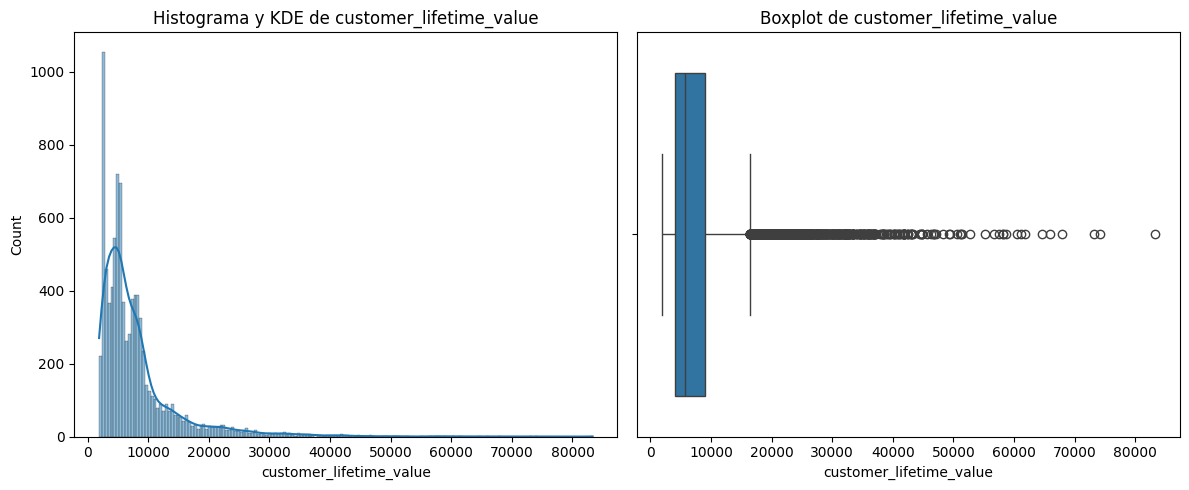

In [65]:
plot_combined_graphs(df_seguros, ["customer_lifetime_value"])

En ambos casos vemos que la larga cola de uno y los valores fuera del "maximum" ya nos indican la presencia de valores anómalos en el rango superior (vamos que se van por la derecha)

Lo que realmente necesitamos es un umbral de corte a partir del cual podamos indicar que lo que es superior o inferior es un valor anómalo. En general este umbral depende de los datos, fíjate que para el diagrama de cajas un punto de corte está por debajo de los 20000 y en el histograma-densidad vemos que podríamos ponerlo más sobre 40000. ¿Cuál coger? ya lo sabes...depende.

1. Cuando la densidad estimada en el diagrama combinado histograma-densidad se parece a una normal, entonces un buen criterio es [y lo explicaremos en la sesión en vivo] obtener la desviación estándar de nuestra variable y considerar outliers a aquellos valores que superen 2 o 3 veces la desviación (valores < media - std\*n) y (valores > media + std\*n) (como puedes ver la distribución normal es simétrica respecto a la media por eso hay que contar a derecha e izquierda). 

|Valor de n | Tanto % de valores comprendidos en el rango no outlier|
|-|-|
|1|68%|
|2|95%|
|3|98%|



2. Si nuestra densidad no tiene pinta de gaussiana, como le pasa a la distribución de valores de CLV, entonces podemos escoger la longitud de los bigotes de nuestro bloxplot, lo que quede por debajo del "minimum" y por encima del maximum serán outliers. Pero para estos casos te recomiendo que aumentes la longitud de los bigotes en función de lo que veas en el histograma. En plata:


(2,)


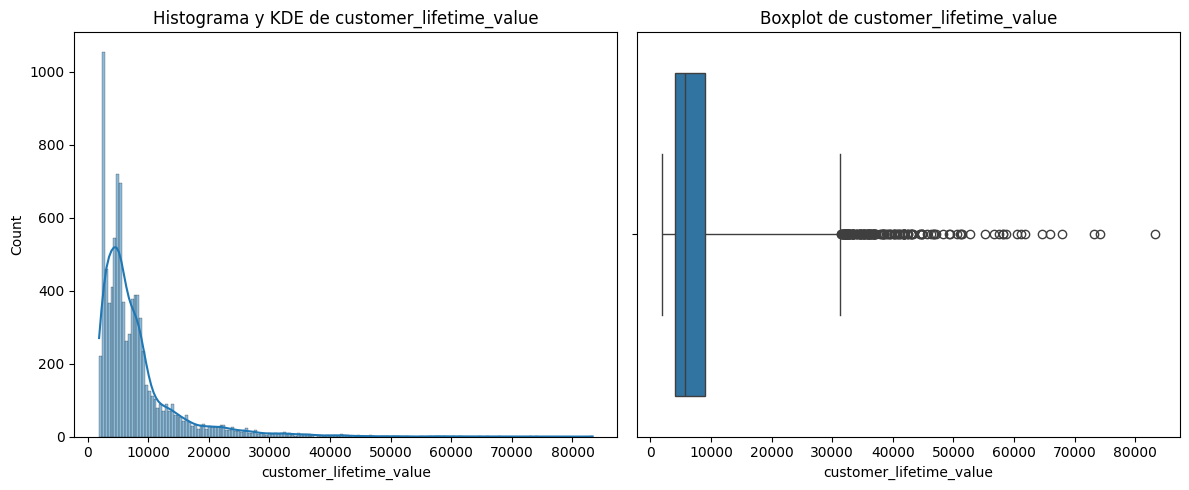

In [66]:
plot_combined_graphs(df_seguros, ["customer_lifetime_value"], whisker_width= 4.5) # 3 veces la longitud habitual (que es 1.5*IQR)

Ahora apliquemos nuestro doble plot a las columnas de los dos datasets para ver que outliers deberíamos tratar:

#### Caso 1.Seguros: Detección de Outliers



(8, 2)


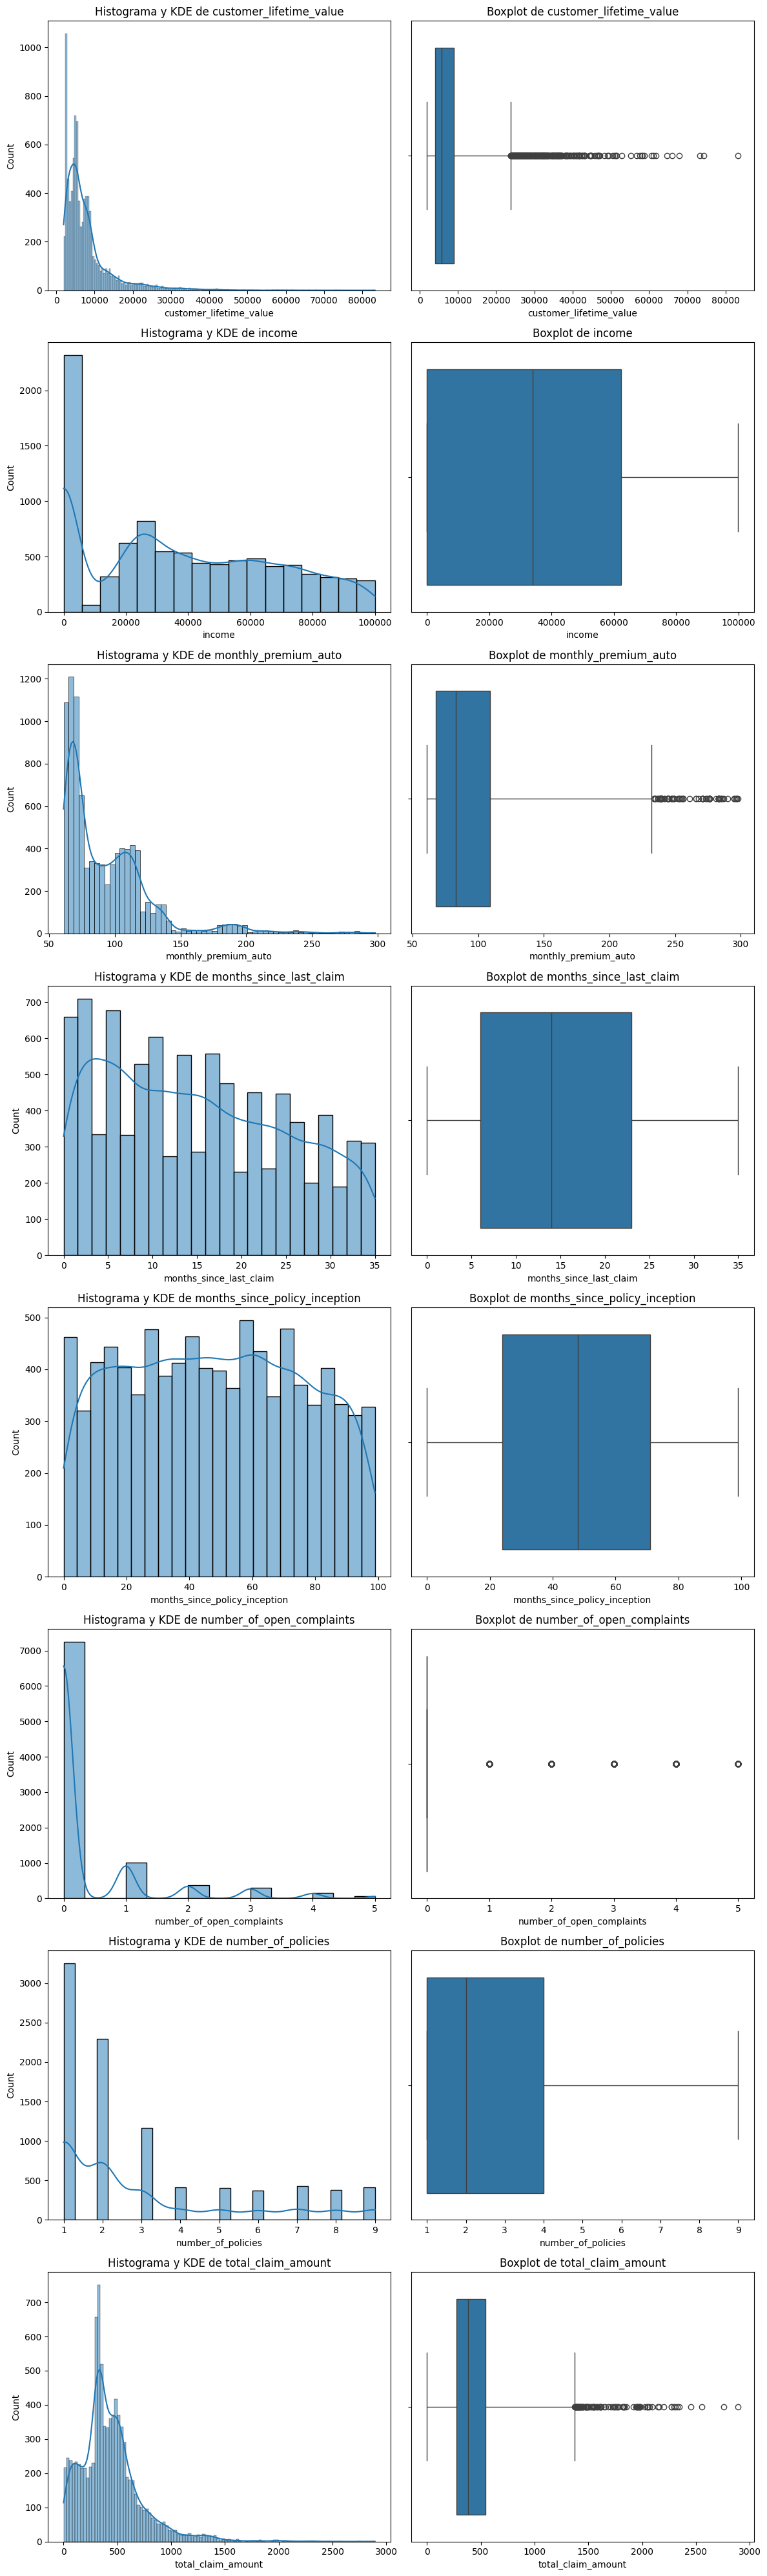

In [68]:
columnas_numericas = df_seguros.describe().columns.to_list()

plot_combined_graphs(df_seguros, columns = columnas_numericas, whisker_width=3)

Hay tres campos o variables claras sobre las que tratar los outliers:
* CLV, que además es prioritaria porque es una de las variables directoras o target.
* Monthly_premium_auto
* Total_claim_amount

Me apuntaría también un análisis que podría ser interesante, ¿coinciden los clientes de los tres outliers? ¿No, por qué?
Y otra cosa curiosa es el diagrama de caja del número de quejas... No me han pedido una análisis pero viendo que tener partes abiertos es un outlier en sí mismo, estudiaría la diferencia entre los clientes con quejas abiertas y sin quejas abiertas.

#### Caso 2. Viajes: Detección de Outliers

(4, 2)


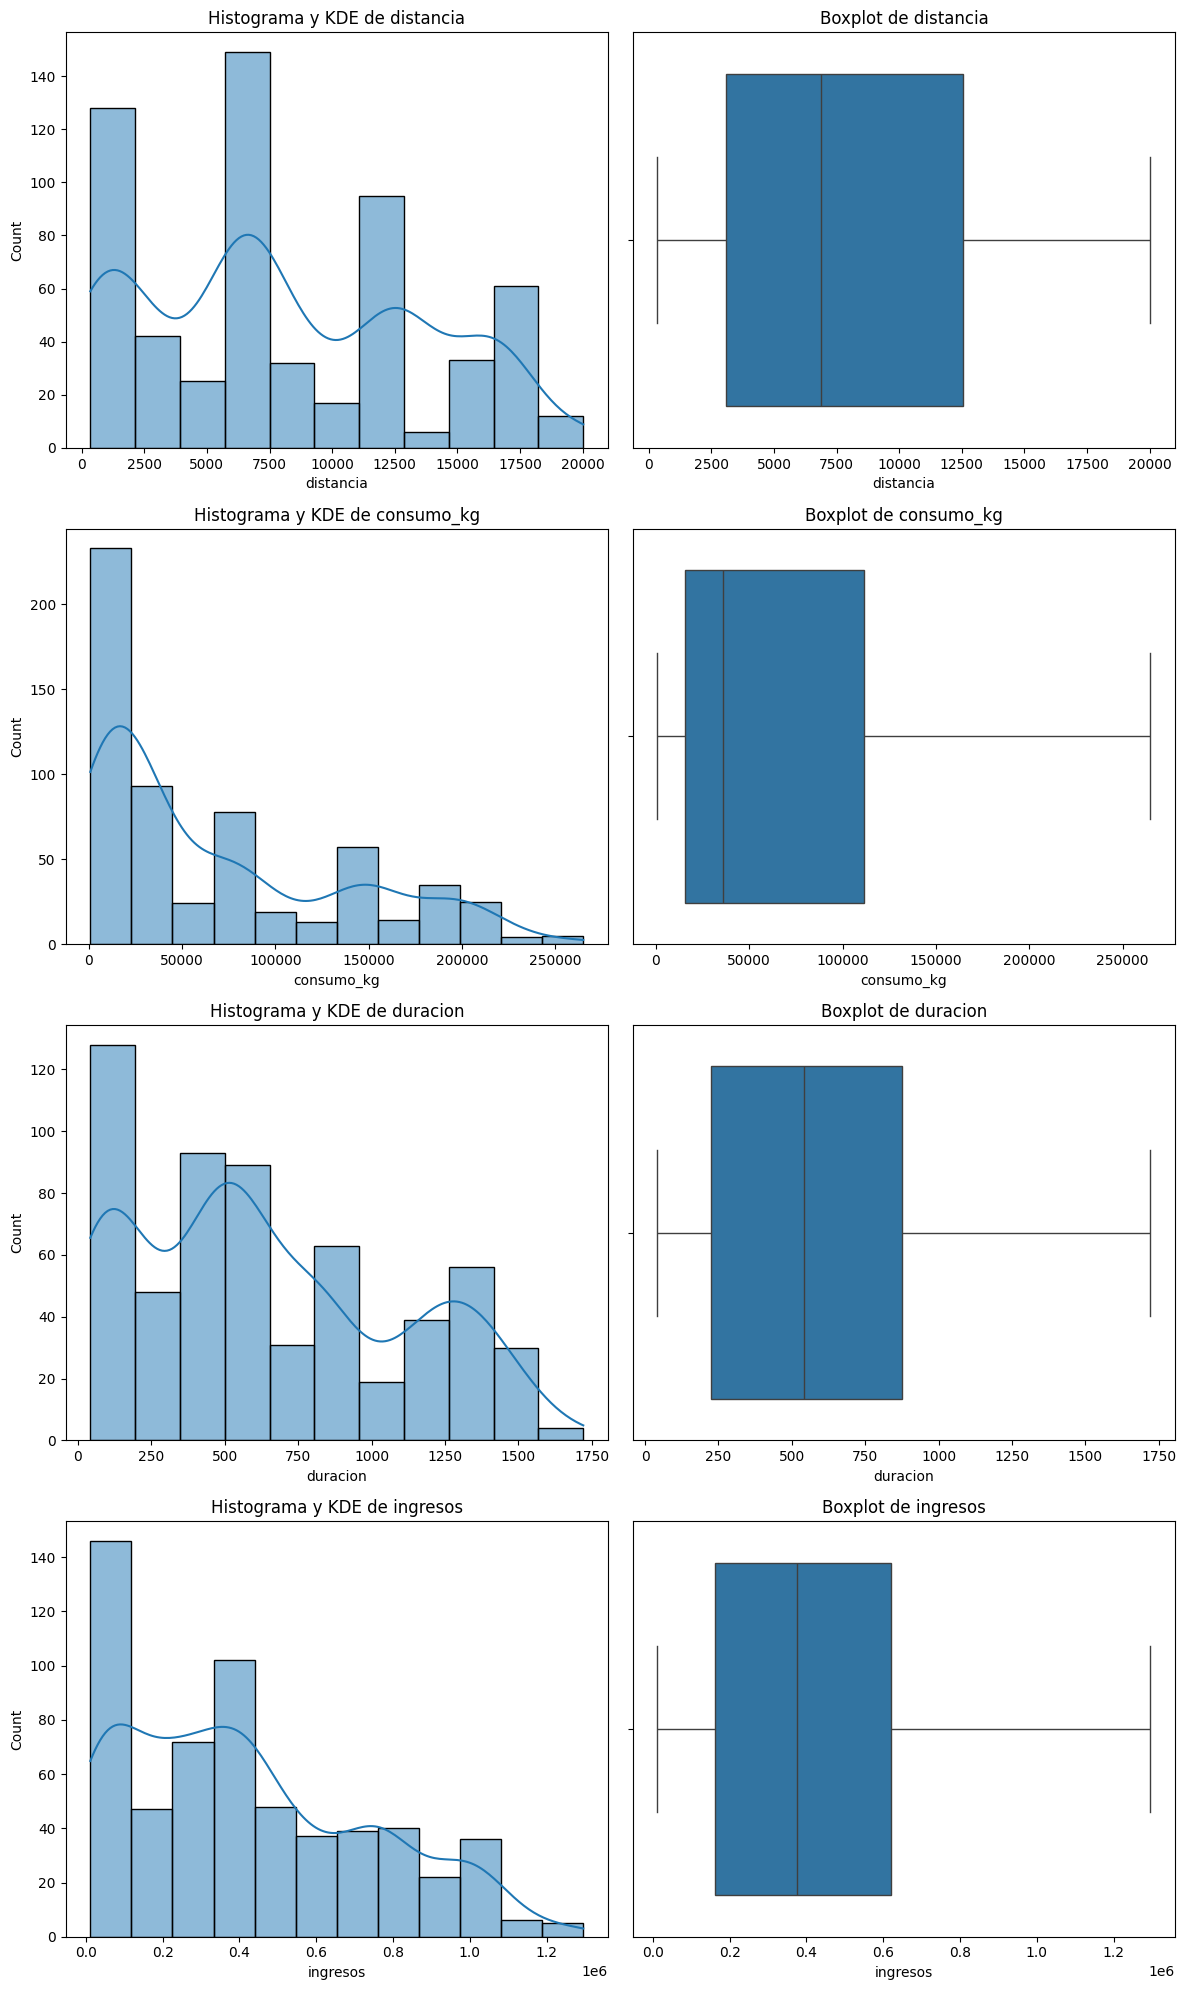

In [69]:
columnas_numericas = df_air_jun.describe().columns.to_list()

plot_combined_graphs(df_air_jun, columns = columnas_numericas, whisker_width= 3)

Así de primeras no hay outliers, y si nos fijamos en los histogramas es cierto que no se ven valores extremos. En este caso, capítulo cerrado.

### Tratamiento de Outliers

Los outliers no son necesariamente malos, de hecho, habrá veces que querrás cazar outliers y que son precisamente esos valores los que te interesan. Por eso qué hacer con ellos depende mucho del problema y el contexto. **No hay una regla para el tratamiento de los mismos**. Un conjunto de posibles tratamientos:

* Mantenerlos 
* Elimiar si son valores erróneos 
* Eliminarlos directamente, indicando que se ha hecho 
* Aplicar transformaciones (se verá en feature engineering). 
* Discretizar la variable 
* Imputar el valor por otro nuevo (como los missings) 
* Tratar por separado 

#### Caso 1. Seguros: Tratamiento de Outliers.

En este caso al ser CLV la variable casi más importante, descartamos eliminarlos, mi sugerencia sería:
1. Asegurarnos de que no son valores erróneos (no tiene pinta)
2. Dividir el dataset en dos, hacer un estudio para unos y otros.
3. Previamente analizar como se relacionan con las otras dos columns de outliers. 

Una vez separados los datasets, analizar los nuevos outliers  (es decir ya en el dataset de outliers de CVL estos ya nos on outliers, pero puede que haya outliers en los otros campos):
1. Categorizar las variables con outliers, rehacer su análisis tal como hicimos con las otras categóricas. 

## Análisis de Datos: Resumen Análisis Univariante

## Funciones:

In [70]:


def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [71]:

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()


In [72]:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [79]:

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:


def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# plot_histograms_with_density(df, ['columna1', 'columna2', 'columna3'], bins=20)


In [ ]:

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()




### Pasos Seguidos


0. **Establecer objetivos** 
1. **Completar la definición de los datos/Rellenar fichas datasets**
2. **Tipificar los datos**
3. **Priorizar variables** 
4. **Aplicar tendencia central a todas las variables**
5. **Analizar las frecuencias de las variables categóricas**: Gráficos de barras 
6. **Analizar las medidas de posición y los rangos de las variables numéricas**: Graficos de Caja
7. **Analizar las medidas de dispersión de las variables numéricas**
8. **Analizar las distribuciones de las variables numéricas**: Histogramas y funciones estimadas de densidad (combinados)
9. **Analizar las anomalías o outliers**: confrontación de histogramas y gráficos de cajas. Umbrales (2-3 desviaciones estándar, 4.5 en tamaño "bigotes")

En los pasos de análisis con medidas y gráficos (4 a 9) seguimos más o menos un orden:
1. Aplicar las medidas y gráficas a todas las variables pertinentes [En los dos casos de uso no ha habido que limitar porque no son muchas pero imaginate que tienes 1000 variables o columnas, tendrías que aplicar la priorización y o bien programar algún tipo de selector de los datos]
2. Analizar por orden de prioridad (primero las targets, luego las de prioridad 1, etc). Este análisis se centra en ver situaciones inesperadas, extremas, o no ver variación (la calma chicha también es una información). Tomar nota de lo destacado para preguntarlo o para guiar nuestro análisis multivariante. 

En general no esperamos obtener gran cantidad de información a presentar de nuestro análisis univariante (pero eso no quiere decir que no lo vayamos a hacer nunca) y nos servirá más para preparar preguntas nuevas o tratamientos de los datos (categorización de algunas valores numéricos, tratamiento de outliers, etc) para acometer con más éxito la segunda parte.



### Algunas "notas"

 Destacaría:
#### Caso 1. Seguros

- En general las medias y las medianas no son buenos indicadores porque se trata de distribuciones de datos o dispersas o poco simétricas. Es mejor hacer un tratamiento por rangos o categorías.
- La respuesta a marketing es de un 14% afirmativa y un 86% negativa, ¿eso es bueno o malo? De primeras a mí me parece malo -> Buscar referencias en Internet, preguntar dentro de la empresa.
- Hay bastantes categorías que tienen un valor dominante claro (tipo de poliza, tipo de coche, empleo/no empleo, etc), ¿Cómo afecta eso a su relación con el CLV?¿Tenemos nuevos segmentos para apostar (los que tienen menos valores?¿Cómo es su relación con la respuesta a los correos? Tengo claro que este será un punto importante en la segunda parte
- El CLV tiene mucha dispersión, outliers y un pico en la parte baja. Es un dato interesante, además de hacer el análisis tal cual, categorizaré el CLV y haré un tratamiento por segmentos de CLV además del general. 
- La variable income también puedo categorizarla o dividir el análisis en dos a partir de un punto de corte en el Income, que tienen un pico importante al principio.
- Hay tres variables (incluida CLV) con outliers. CLV lo voy a tratar categorizándolos con una etiqueta especial. Tendré que ver qué hacer con los otros dos.
- Puede ser interesante cotejar las características de los clientes que tienen reclamaciones abiertas y los que no.

Fijate que todavía no he colocado números salvo en casos muy claros. ¿Por qué? Porque hasta que no relacione variables no sé cuales son los números relevantes. Esto es más por mi desconocimiento del contexto de los seguros americanos que por otra cosa (no tengo ni idea de si un 37% de coches de cuatro es algo significativo en el sector USA, por ejemplo...)

### Caso 2. Viajes

Dado que no tenemos un objetivo claro salvo "sacarle todo el jugo" en realidad cualquier cosa por ahora es interesante, aunque yo destacaría:
* Parece claro que hay que perfilar todo el análisis dividiendo por compañía y luego comparar.
* Tabarair como empresa con más vuelos, ¿es la que más ingresos tiene? ¿Es la que mas consume? 
* Barcelona como potencial lugar de crecimiento por estar menos atendida que el resto de lugares (Cádiz parece tener potencial)
* Analizar si Bali y Ginebra están satuarados como mercado.
* Comparar ingresos con consumos y ver la relación, ¿hay algún tipo de viaje que sea más beneficioso? (las gráficas de distribución de valores invitan un poco a ello)
* Dado que el A320 es el de menor uso claramente, ¿cómo es su ingreso medio?¿y su consumo? (si el ingreso está por encima por ejemplo, quizá lo estamos infrautilizando)
* Los datos no tienen outliers destacados, no hay que hacer mucho más con ellos.




### Qué me gustaría tener en este punto

Además de las tablas del principio rellenas con sus descripciones, tipos de variables e importancias (quizás ahora rectificadas o reordenadas). Me gustaría tener por cada variable:

* Su tendencia central
* Sus diagramas de barras o histogramas-densidad según el tipo de variable
* Su desviación estándar, diagrama de caja y rangos.
* Detectados los posibles outliers
* Un conjunto de conclusiones o puntos de acción  sobre esa variable.

####  Caso 1. Seguros: Ejemplo medidas y gráficas univariantes

In [73]:
df_seguros["customer_lifetime_value"].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

(2,)


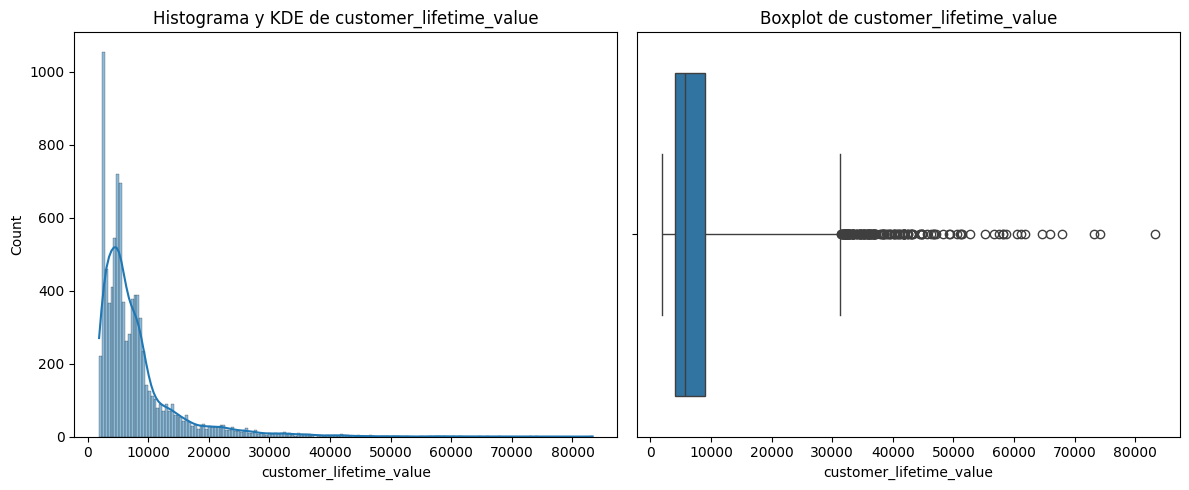

In [74]:
plot_combined_graphs(df_seguros, ["customer_lifetime_value"], whisker_width= 4.5)

Notas: 
- Existen outliers que "dispersan" la muestra, es mejor emplear la median (5780) como representativa frente a la media (8004), si no se excluyen esos outliers.
- A pesar de los anómalos, existe una concentración de valores importantes en la zona baja. Hacer el analisis por segmentos de CLV además de CLV total, así podría tratar también el segmento anómalo.
- Para el segmento anómalo, ver su distribución demográfica, ¿hay un pérfil o perfiles claros?
- Existen valores significativos (en la zona baja), analizar esos clientes y preguntar sobre estos igual que sobre los outliers.

##### **Response** (Respuesta a ofertas de marketing):

Para el caso de las categóricas, me llega con mostrar de primeras su distribución frecuencial y destacar el valor máximo:

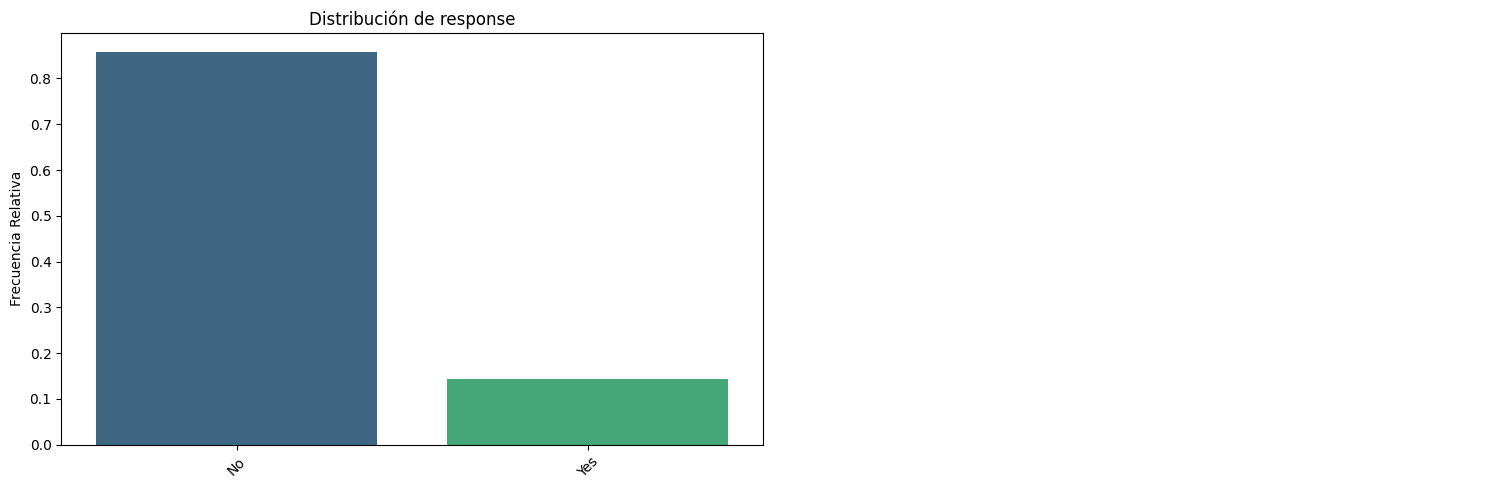

In [78]:
pinta_distribucion_categoricas(df_seguros, ["response"], relativa = True)

Notas:
* Claramente domina la negativa (86%) [aquí marco la moda] frente a la respuresta positiva (16%). ¿Es esto una tendencia normal? Buscar referencias, preguntar dentro de la empresa.
* Habrá que abrir los dos perfiles y compararlos, es claramente una vairable para dirigir el análisis multivariante (es decir ver como varían las otras variables en función de los valores de esta)

Y haría lo mismo para el caso 2. Ojo, y para el resto de todas las variables, si son muchas pues por orden de prioridad hasta que consideremos que hemos dedicado el tiempo suficiente (el estar más cerca de los objetivos nos dará una idea de cuando acabar)

### Próximos pasos

Lo siguiente es coger nuestras preguntas iniciales, nuestras nuevas preguntas y notas y comenzar el análisis multivariante. Para ello en la primera sesión de la siguiente unidad haremos un plan de ataque (la combinatoria de variables puede matarte por AnalysisParalisys) y empezaremos a ver ya resultados que formen parte de lo que será la presentación final.